In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Charge all the datasets of information



In [380]:
# charge data_01, data_03, data_05
data_01 = pd.read_csv("data_0.1.csv")
data_03 = pd.read_csv("data_0.3.csv")
data_05 = pd.read_csv("data_0.5.csv")
data_07 = pd.read_csv("data_0.7.csv")

##### **Calculate the mean of every row of the dataset**

In [381]:
# calculate the mean of every id and group by model
data_01_mean = data_01.groupby(["model", "Ratio", "Replace", "dataset"]).mean()
data_03_mean = data_03.groupby(["model", "Ratio", "Replace", "dataset"]).mean()
data_05_mean = data_05.groupby(["model", "Ratio", "Replace", "dataset"]).mean()
data_07_mean = data_07.groupby(["model", "Ratio", "Replace", "dataset"]).mean()

# merge the dataframes
data_mean = pd.concat([data_01_mean, data_03_mean, data_05_mean, data_07_mean]).drop(
    ["id"], axis=1
)
data_mean.reset_index(inplace=True)
data_mean.sort_values(by=["model", "dataset", "Ratio"], inplace=True)
# reset index
data_mean.reset_index(inplace=True)
data_mean.drop(["index"], axis=1, inplace=True)
data_mean.head()

model  Ratio  Replace  dataset  Accuracy  F1 Prefix  F1 random  \
0  euclidean   0.25      0.1       10  0.991400   0.994044   0.982752   
1  euclidean   0.25      0.3       10  0.990567   0.993496   0.981651   
2  euclidean   0.25      0.5       10  0.783367   0.866520   0.417194   
3  euclidean   0.25      0.7       10  0.780533   0.863081   0.439475   
4  euclidean   0.50      0.1       10  0.993833   0.994070   0.993808   

   Recall Prefix  Recall random  Precision Prefix  ...  train Accuracy 5  \
0       0.999977       0.966169          0.988183  ...          0.988721   
1       1.000000       0.964030          0.987085  ...          0.988042   
2       0.805590       0.645408          0.938555  ...          0.773679   
3       0.808735       0.624007          0.926249  ...          0.772300   
4       1.000000       0.987707          0.988225  ...          0.976725   

   train Accuracy 6  train Accuracy 7  train Accuracy 8  train Accuracy 9  \
0          0.989596          0.989788          0.990842          0.990187   
1          0.989833          0.989975          0.989663          0.990425   
2          0.777587          0.778367          0.778096          0.779808   
3          0.772892          0.774925          0.774842          0.775062   
4          0.980421          0.981271          0.986075          0.990250   

   train Accuracy 10  train Accuracy 11  train Accuracy 12  train Accuracy 13  \
0           0.989258           0.990658           0.990804           0.991321   
1           0.990483           0.991312           0.990746           0.991321   
2           0.780238           0.780238           0.779938           0.782158   
3           0.776279           0.775921           0.779058           0.779550   
4           0.992825           0.993138           0.992954           0.994012   

   train Accuracy 14  
0           0.991146  
1           0.990396  
2           0.783388  
3           0.780463  
4           0.993942  

[5 rows x 71 columns]

In [445]:
data_normal = data_mean.query("Ratio != 0.25   ")

# make a table comparring accuracy of the diferent model with same ratio, replace and dataset
data_accuracy = data_normal.pivot_table(
    index=["dataset", "model", "Replace"],
    values=[
        "Accuracy",
        "F1 Prefix",
        "F1 random",
        "Recall Prefix",
        "Recall random",
        "Precision Prefix",
        "Precision random",
    ],
)
data_accuracy.reset_index(inplace=True)
data_accuracy["experiment"] = (
    "Prefix "
    + data_accuracy["dataset"].astype(str)
    + "%- Replace:"
    + data_accuracy["Replace"].astype(str)
)
data_accuracy = data_accuracy.pivot(
    index="experiment", columns="model", values="Accuracy"
)
data_accuracy.style

pass this to a new dataset

In [125]:
data_mean.to_csv("data_mean.csv")

### Graphics of comparing loss on train and val on every experiment

In [126]:
train_loss = [col for col in data_mean.columns if "Train Loss" in col]
val_loss = [col for col in data_mean.columns if "Val Loss" in col]
train_acc = [col for col in data_mean.columns if "train Accuracy" in col]
test_acc = [col for col in data_mean.columns if "test Accuracy" in col]
train_loss_df = data_mean[train_loss]
val_loss_df = data_mean[val_loss]
train_accuracies_df = data_mean[train_acc]
test_accuracies_df = data_mean[test_acc]


def get_mean(df, mode):
    new = []
    for i in range(len(df.columns)):
        # obtain the columns
        col = df.columns[i]
        val = df[col]
        new.append(val)
    columns = []
    for i in range(len(data_mean)):
        # obtain the columns
        name = (
            data_mean["model"][i]
            + " "
            + str(data_mean["dataset"][i])
            + " "
            + str(data_mean["Ratio"][i])
            + " "
            + str(data_mean["Replace"][i])
        )
        columns.append(name)
    return new, columns


train_values, train_columns = get_mean(train_loss_df, "Train Loss")
val_values, val_columns = get_mean(val_loss_df, "Val Loss")
acc_values, acc_columns = get_mean(train_accuracies_df, "train Accuracy")
test_values, test_columns = get_mean(test_accuracies_df, "Test Accuracy")

train_loss = pd.DataFrame(train_values)
val_loss = pd.DataFrame(val_values)
train_acc = pd.DataFrame(acc_values)
test_acc = pd.DataFrame(test_values)


# rename columns whit the name of the model
train_loss.columns = train_columns
val_loss.columns = val_columns
train_acc.columns = acc_columns
test_acc.columns = test_columns


for df in [train_loss, val_loss, train_acc, test_acc]:
    df.reset_index(inplace=True)
    df.drop(["index"], axis=1, inplace=True)

In [127]:
train_loss.head()

euclidean 10 0.25 0.1  euclidean 10 0.25 0.3  euclidean 10 0.25 0.5  \
0               0.528818               0.510273               0.570557   
1               0.267904               0.236389               0.550342   
2               0.137770               0.126814               0.525370   
3               0.096025               0.089310               0.500221   
4               0.076159               0.071170               0.484589   

   euclidean 10 0.25 0.7  euclidean 10 0.5 0.1  euclidean 10 0.5 0.3  \
0               0.572487              0.612574              0.597666   
1               0.551395              0.249025              0.232366   
2               0.525446              0.135664              0.124614   
3               0.499482              0.102822              0.088573   
4               0.484276              0.085758              0.070339   

   euclidean 10 0.5 0.5  euclidean 10 0.5 0.7  euclidean 30 0.25 0.1  \
0              0.699978              0.699984               0.434886   
1              0.668797              0.668159               0.108704   
2              0.631512              0.623389               0.043326   
3              0.599983              0.590520               0.025250   
4              0.580125              0.573443               0.017001   

   euclidean 30 0.25 0.3  ...  hyperbolic 30 0.5 0.5  hyperbolic 30 0.5 0.7  \
0               0.524612  ...               0.689012               0.701004   
1               0.338566  ...               0.625199               0.681098   
2               0.250589  ...               0.574920               0.663638   
3               0.209291  ...               0.542066               0.649346   
4               0.183120  ...               0.514529               0.638431   

   hyperbolic 50 0.25 0.1  hyperbolic 50 0.25 0.3  hyperbolic 50 0.25 0.5  \
0                0.441601                0.527375                0.563286   
1                0.182146                0.382989                0.511063   
2                0.129383                0.317077                0.470524   
3                0.105057                0.285171                0.446680   
4                0.090551                0.262491                0.430018   

   hyperbolic 50 0.25 0.7  hyperbolic 50 0.5 0.1  hyperbolic 50 0.5 0.3  \
0                0.572868               0.469382               0.618670   
1                0.553943               0.188925               0.427153   
2                0.545572               0.139987               0.361947   
3                0.537325               0.114771               0.327155   
4                0.530396               0.098944               0.299212   

   hyperbolic 50 0.5 0.5  hyperbolic 50 0.5 0.7  
0               0.679583               0.699976  
1               0.599198               0.682692  
2               0.552046               0.669517  
3               0.525061               0.658139  
4               0.506256               0.649257  

[5 rows x 48 columns]

***Function to obtain the loss of each experiment***

In [301]:
def filter(df, types, alls, filtter, dataset="10", replace="0.1", positive="0.5"):

    positives = ["0.25", "0.5", "0.75"]
    replaces = ["0.1", "0.3", "0.5", "0.7"]
    datasets = ["10", "30", "50"]
    positives.remove(positive)
    if replace != "0":
        replaces.remove(replace)
    if dataset != "0":
        datasets.remove(dataset)
    data = df.copy()
    finals = []
    stay = []
    for i in range(len(df.columns)):
        # obtain the columns
        col = df.columns[i]
        dataseet = col.split(" ")[1]
        postivi = col.split(" ")[2]
        replaced = col.split(" ")[3]
        if alls:
            if positive == postivi and replace in ["0.5", "0.7"]:
                stay.append(col)
                finals.append(col.split(" ")[0] + " " + types)
        else:
            if (
                (dataset == dataseet or dataset == "0")
                and (replace == replaced or replace == "0")
                and positive == postivi
            ):
                stay.append(col)
                finals.append(col.split(" ")[0] + " " + types)
            elif filtter in col and filtter != "":
                stay.append(col)
                finals.append(col.split(" ")[0] + " " + types)
    data = data[stay]
    data.columns = finals
    return data


def values(
    train,
    other,
    types,
    filtter="",
    alls=False,
    dataset="10",
    replace="0.5",
    postives="0.5",
):
    train = filter(train, "train", alls, filtter, dataset, replace, postives)
    other = filter(other, types, alls, filtter, dataset, replace, postives)

    return pd.concat([train, other], axis=1)

# **Compares of Accuracy and Loss**



### 1) ***All experiments comparation***

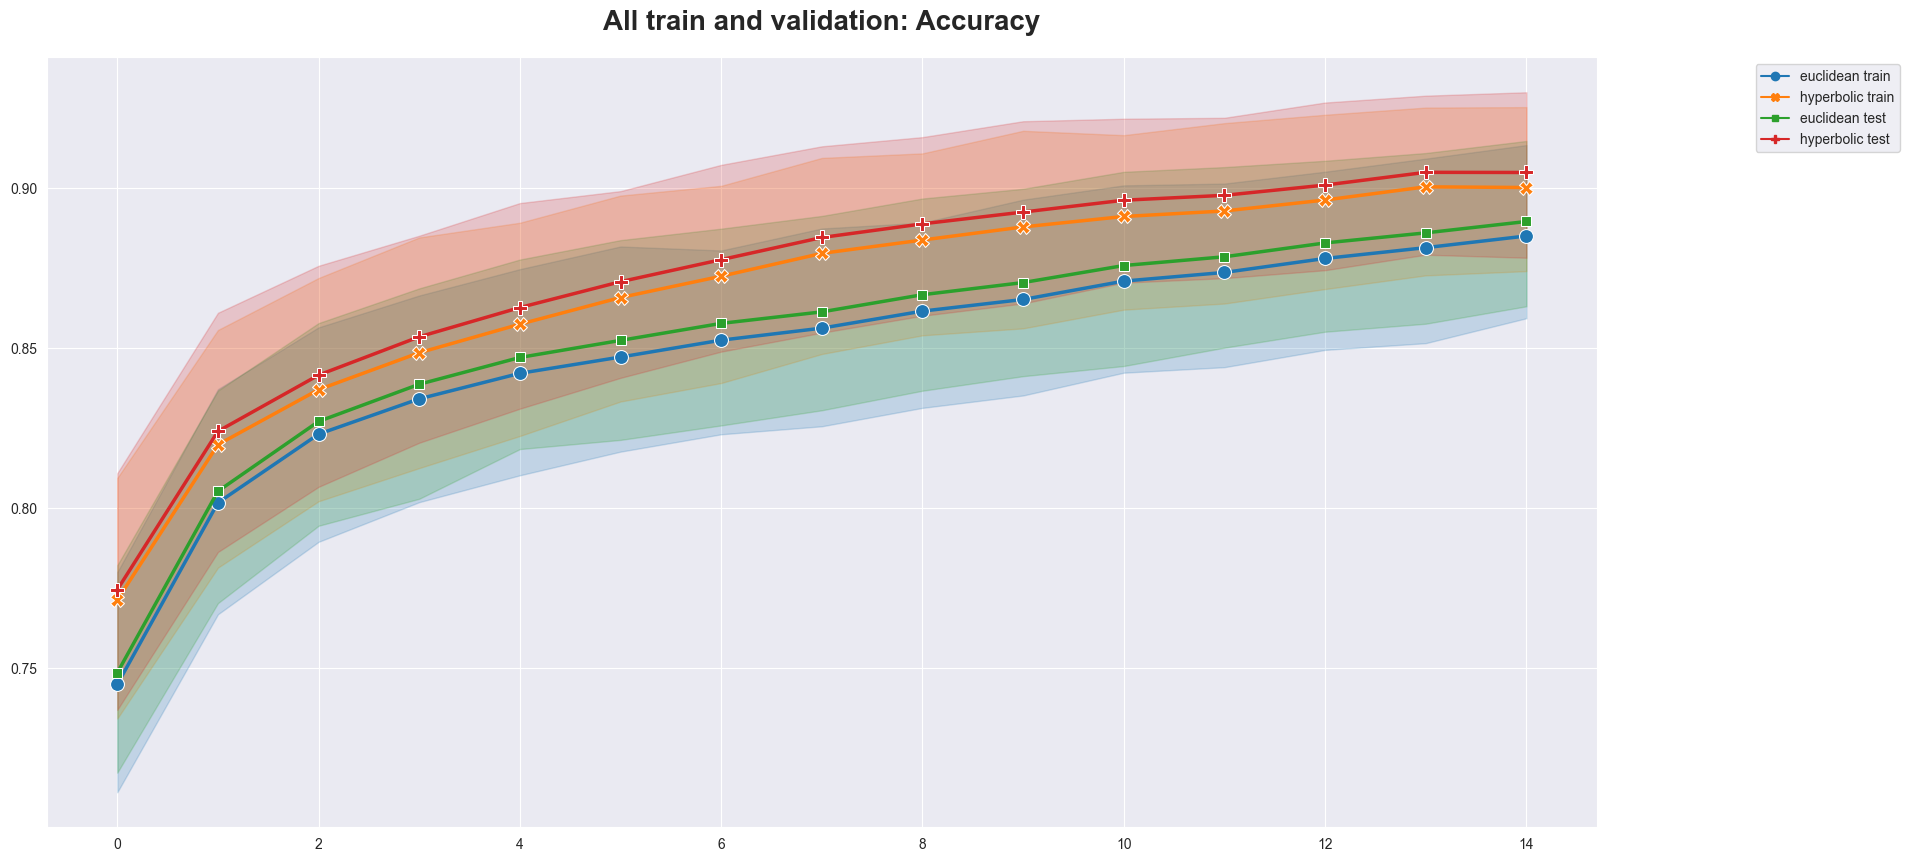

In [302]:
sns.set_style("darkgrid")
data = values(types="test", train=train_acc, other=test_acc, alls=True)
plt.figure(figsize=(20, 10))

sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), ncol=1)
plt.title("All train and validation: Accuracy", fontsize=20, fontweight="bold", pad=20)
plt.show()

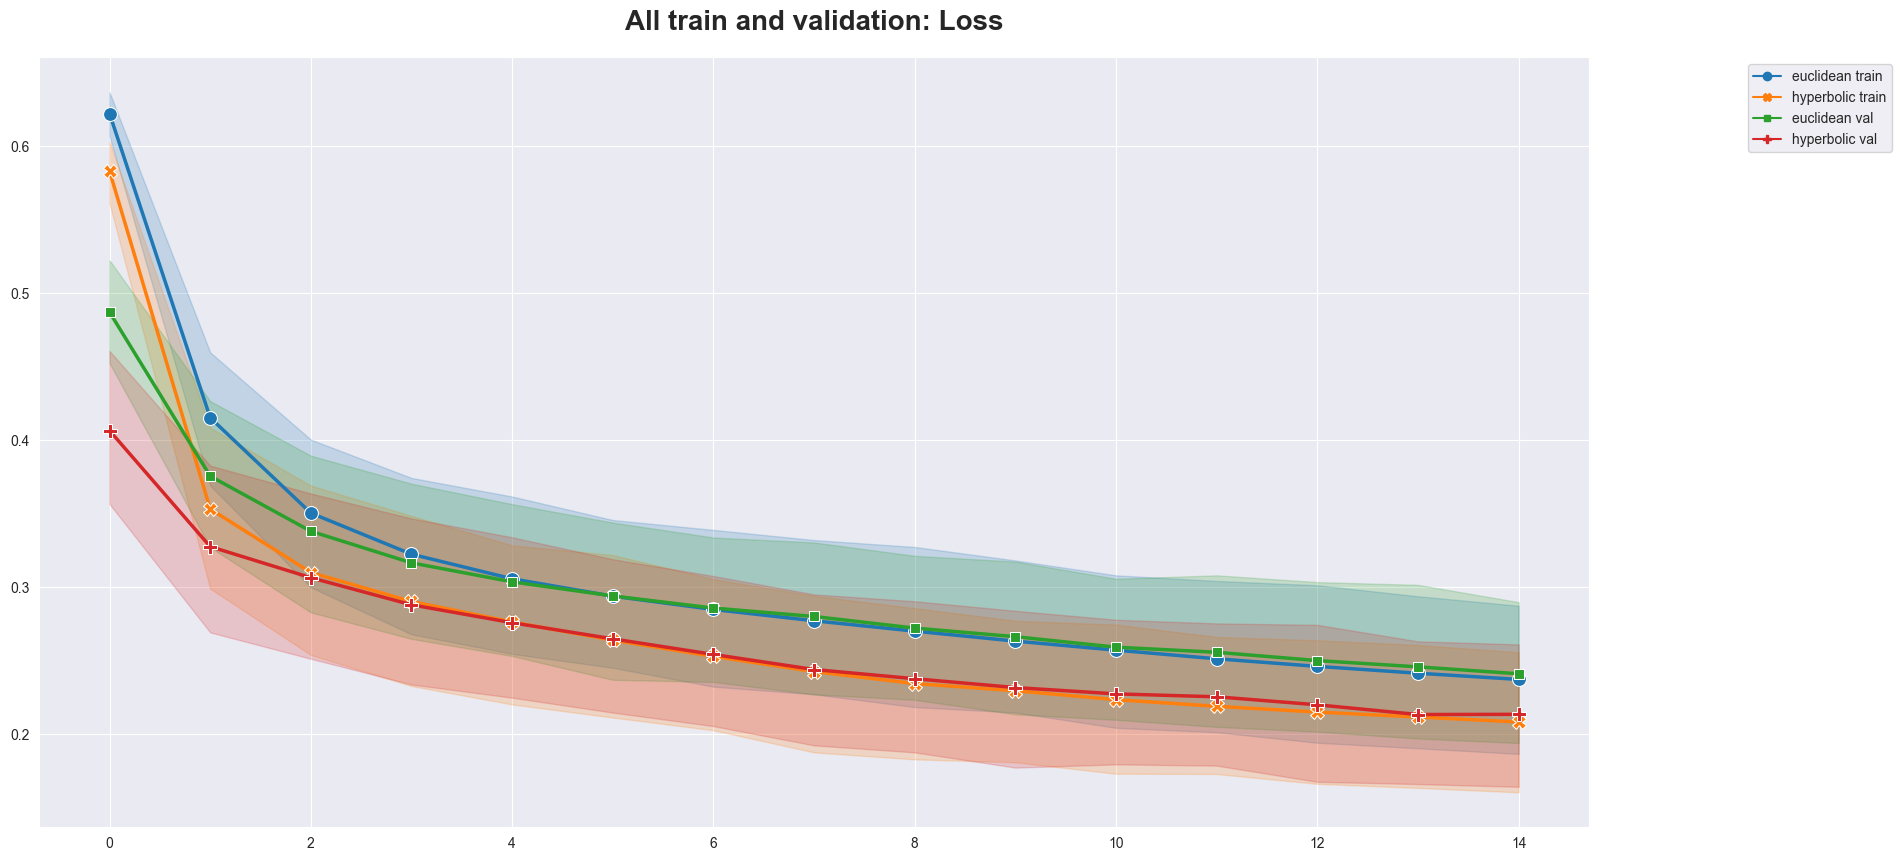

In [303]:
sns.set_style("darkgrid")
data = values(types="val", train=train_loss, other=val_loss, alls=True)
plt.figure(figsize=(20, 10))

sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), ncol=1)
plt.title("All train and validation: Loss", fontsize=20, fontweight="bold", pad=20)
plt.show()

### 2) Comparation of Z-Prefix


#### 1) ***Z-Prefix 10%***

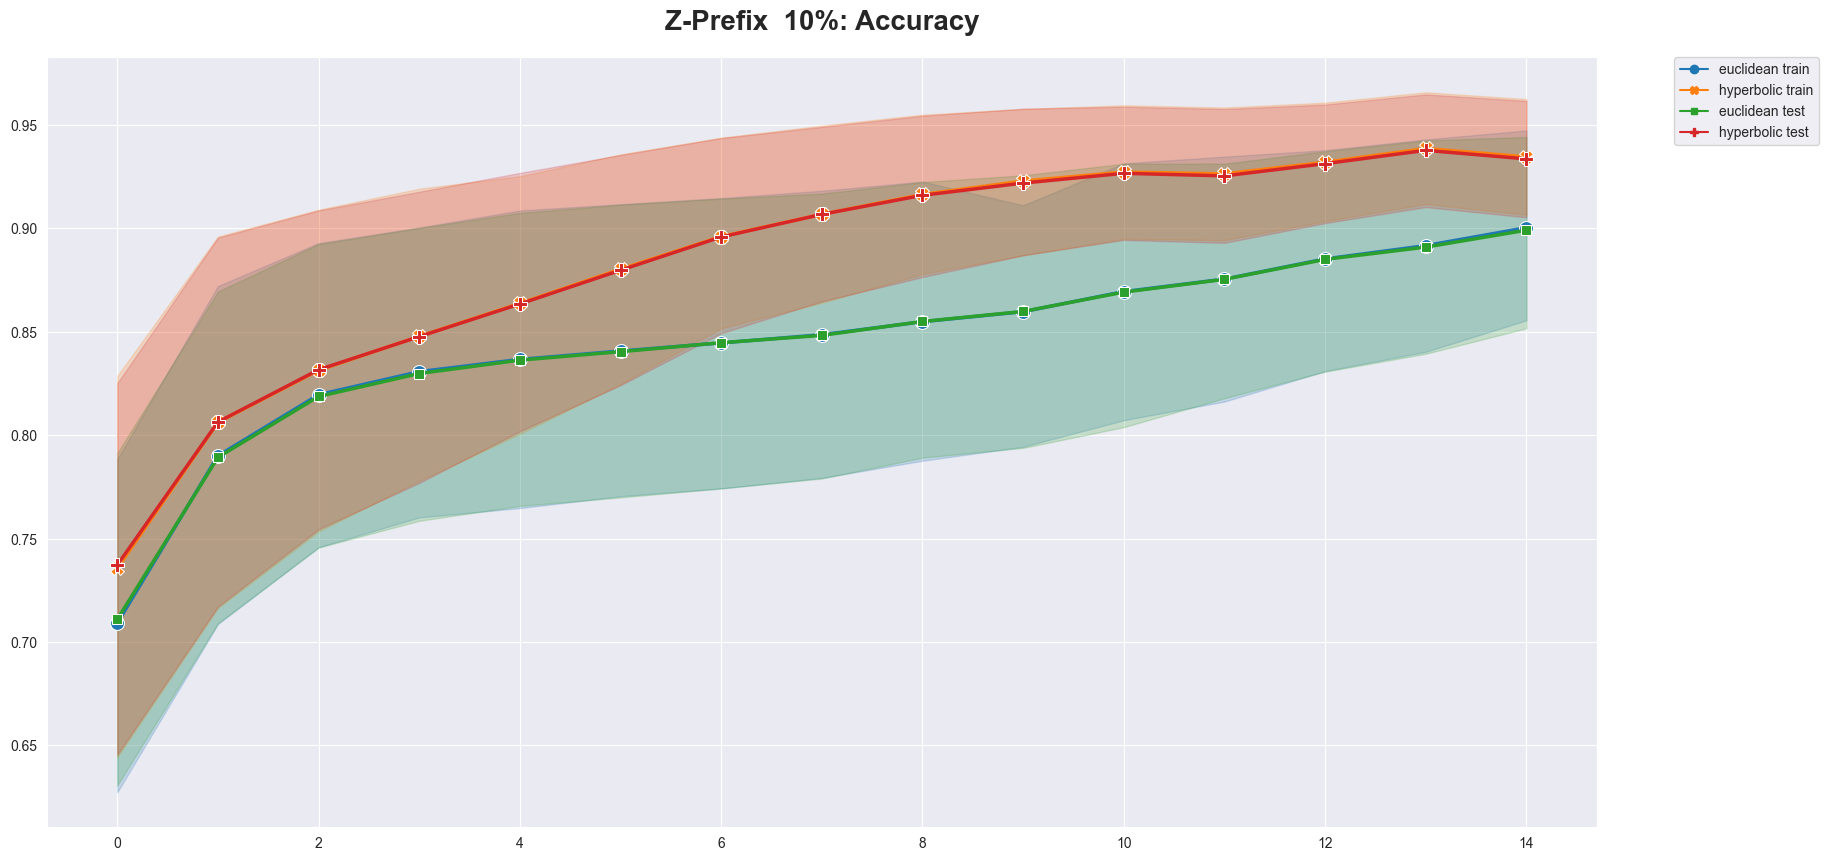

In [304]:
data = values(
    types="test",
    dataset="10",
    postives="0.5",
    replace="0",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  10%: Accuracy", fontsize=20, fontweight="bold", pad=20)
plt.show()

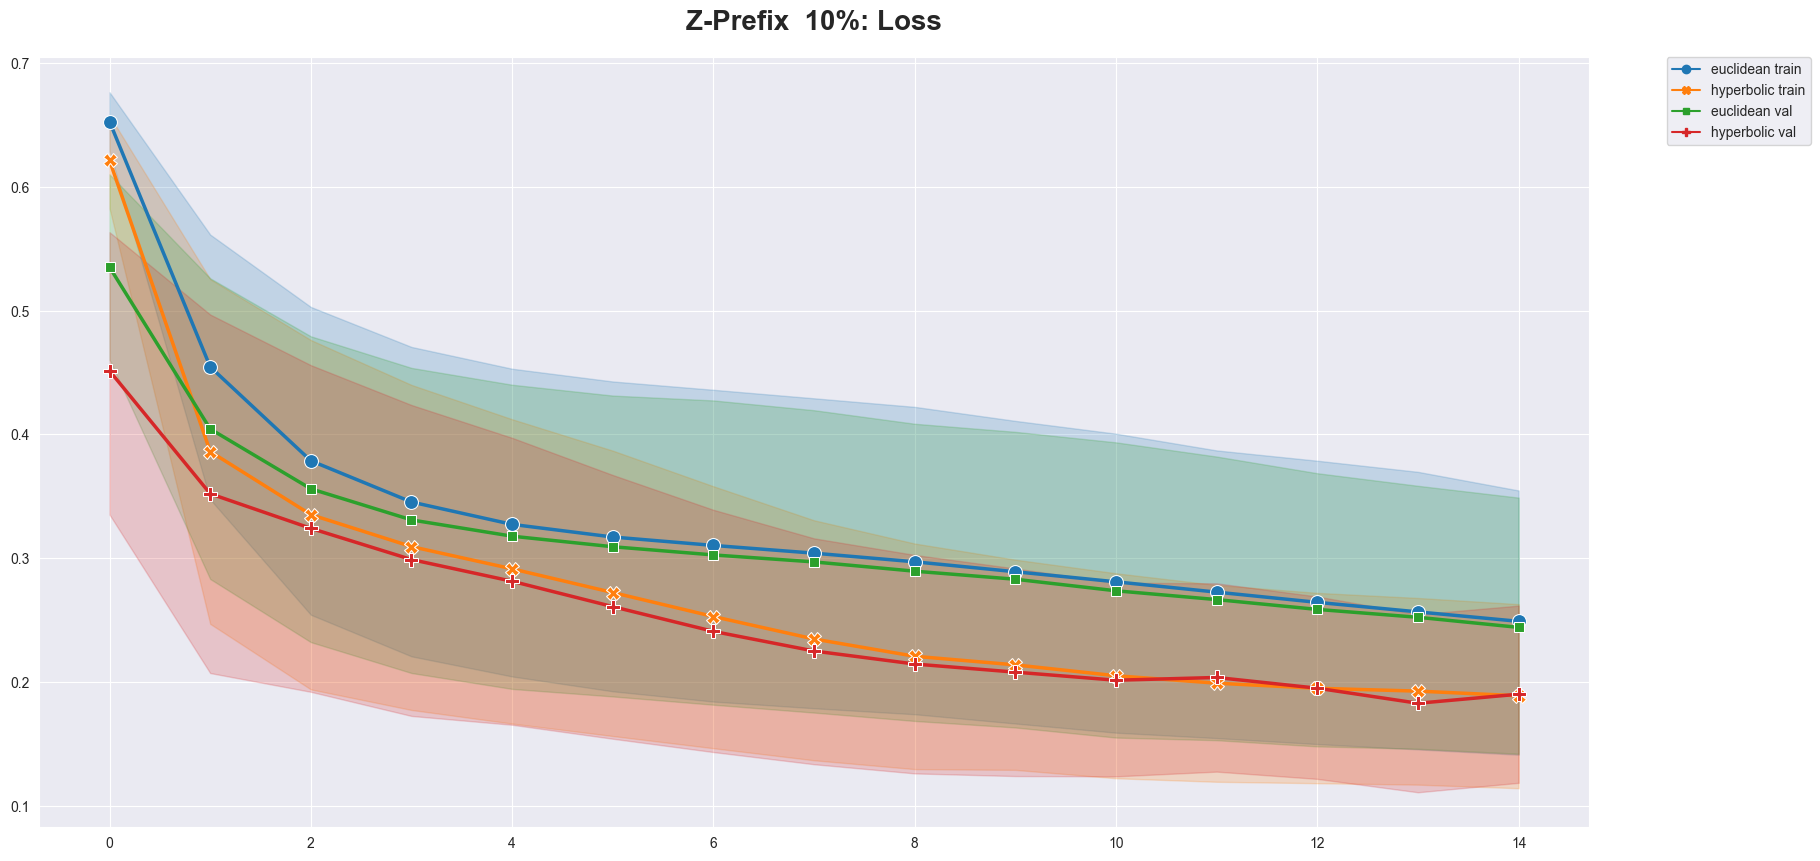

In [305]:
data = values(
    types="val",
    dataset="10",
    postives="0.5",
    replace="0",
    train=train_loss,
    other=val_loss,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  10%: Loss", fontsize=20, fontweight="bold", pad=20)
plt.show()

### ***Z-Prefix 30%***

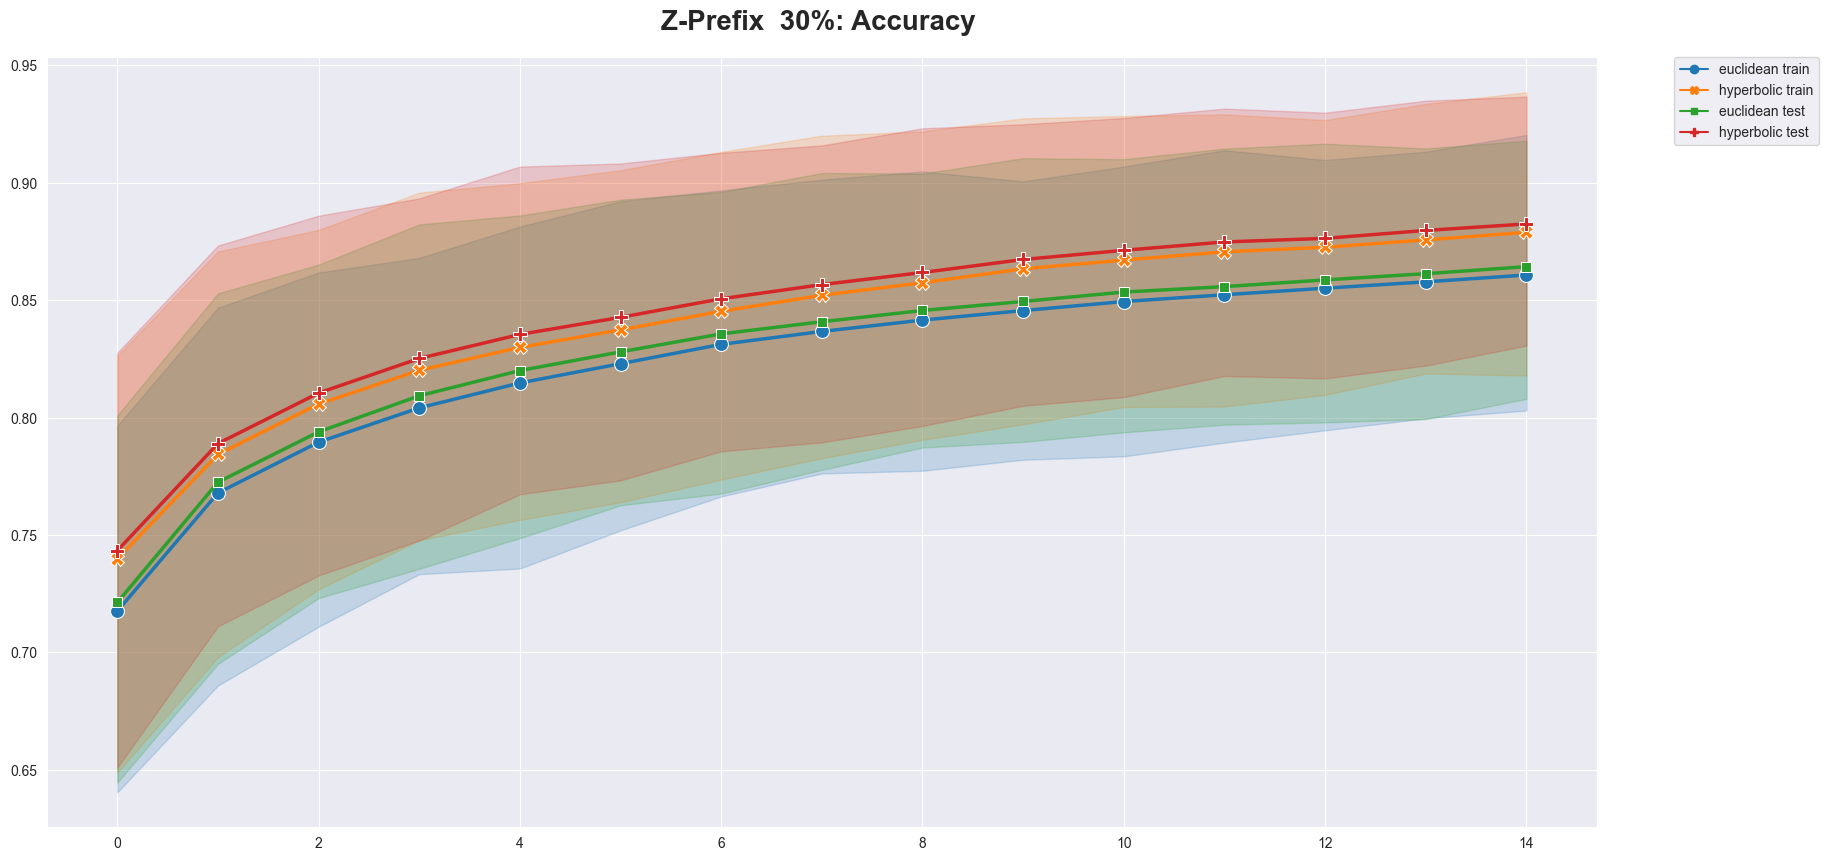

In [193]:
data = values(
    types="test",
    dataset="30",
    postives="0.5",
    replace="0",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  30%: Accuracy ", fontsize=20, fontweight="bold", pad=20)
plt.show()

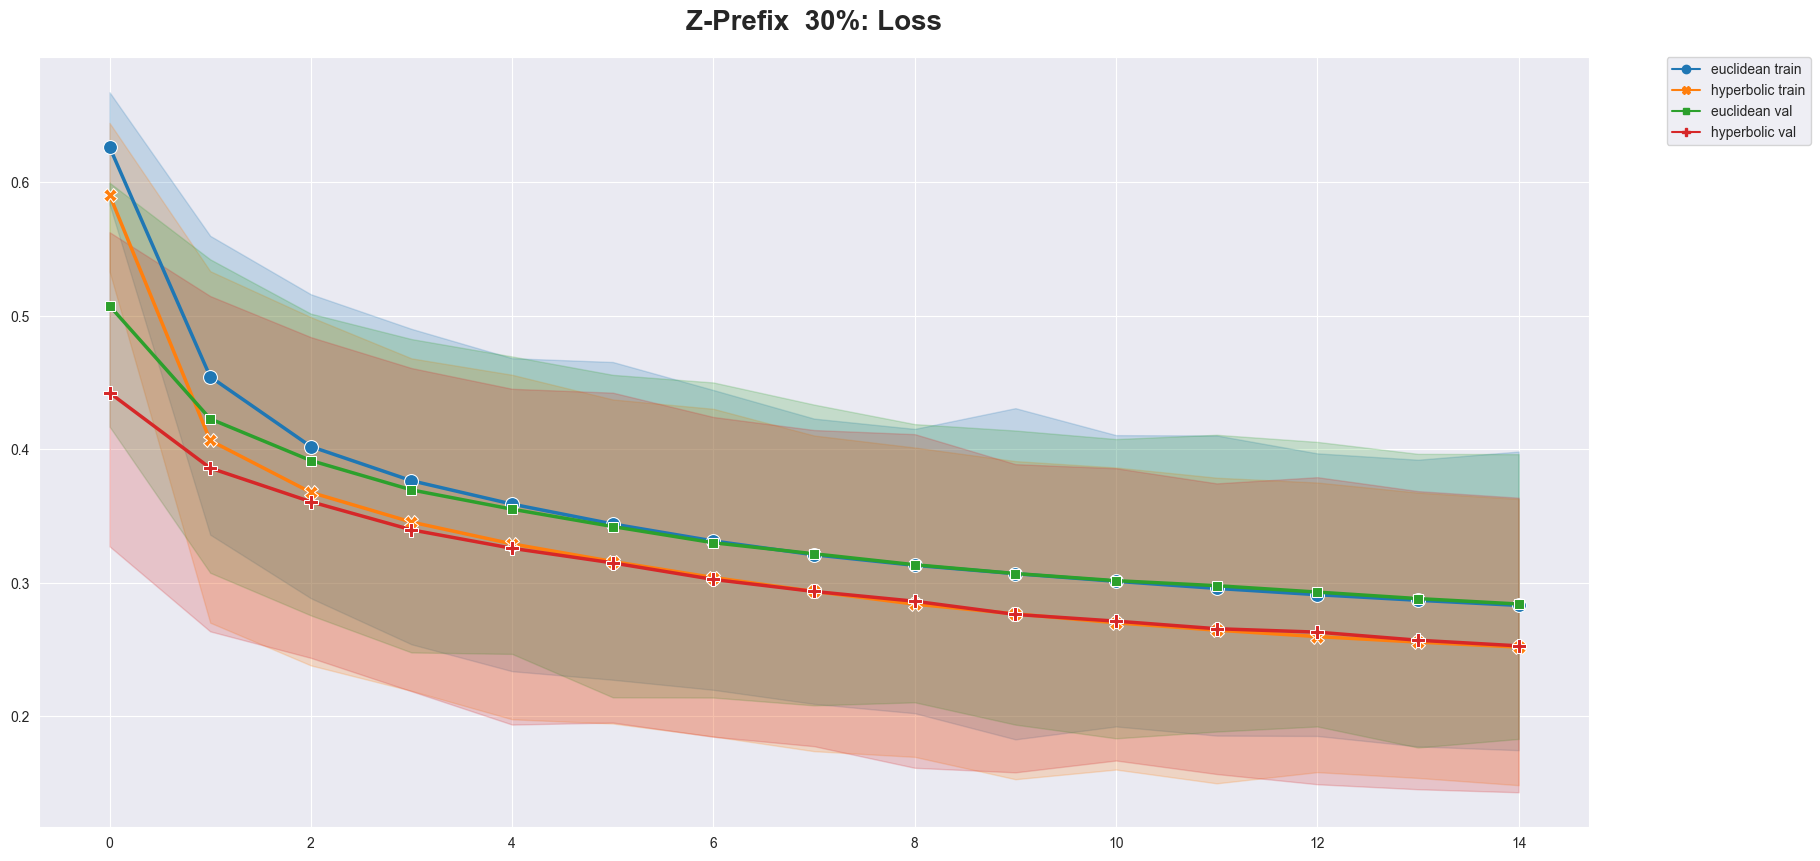

In [194]:
data = values(
    types="val",
    dataset="30",
    postives="0.5",
    replace="0",
    train=train_loss,
    other=val_loss,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  30%: Loss", fontsize=20, fontweight="bold", pad=20)
plt.show()

### ***Z-Prefix 50%***

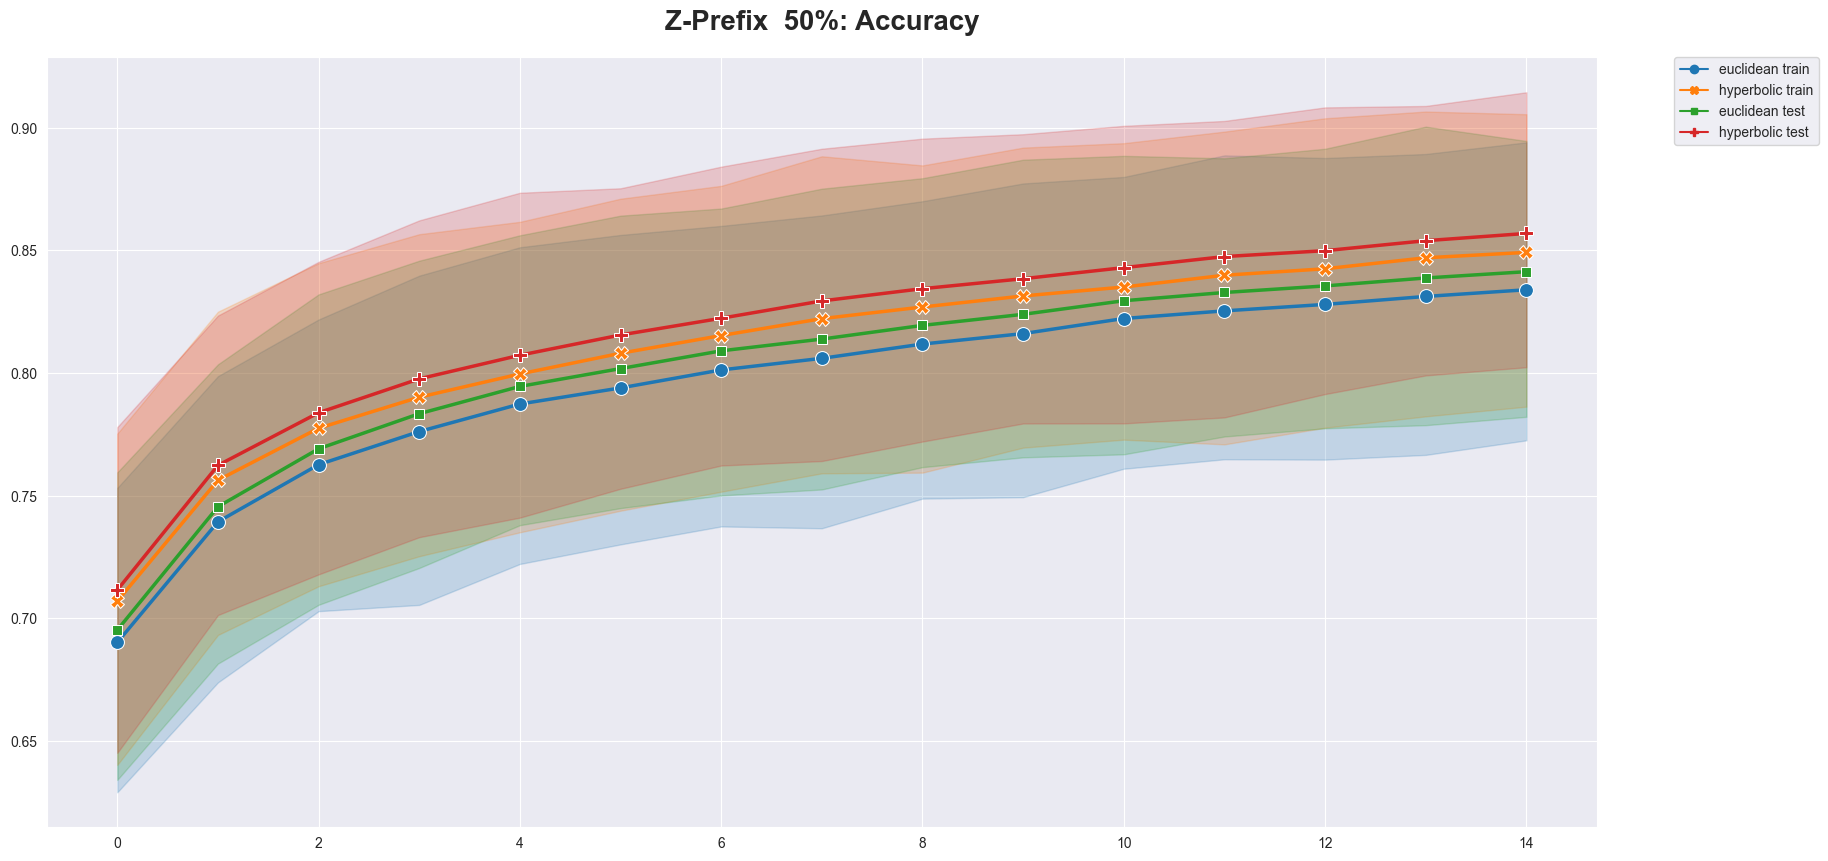

In [195]:
data = values(
    types="test",
    dataset="50",
    postives="0.5",
    replace="0",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  50%: Accuracy", fontsize=20, fontweight="bold", pad=20)
plt.show()

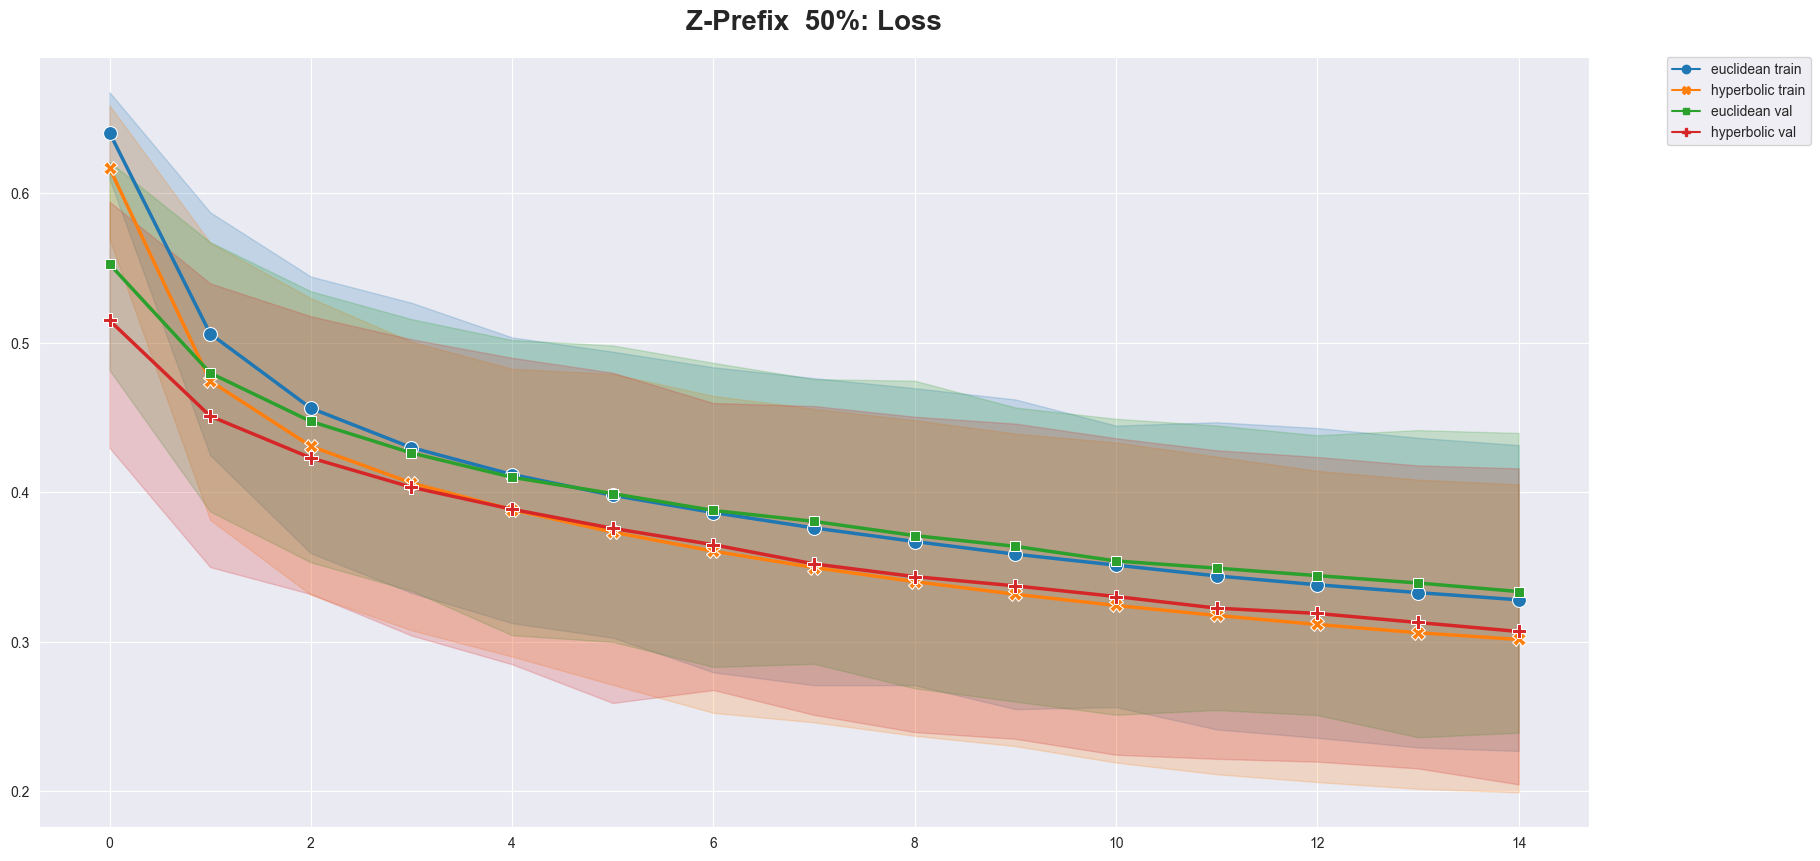

In [196]:
data = values(
    types="val",
    dataset="50",
    postives="0.5",
    replace="0",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix  50%: Loss", fontsize=20, fontweight="bold", pad=20)
plt.show()

## 3) Only  Replace comparation

### ***Replace 10%***

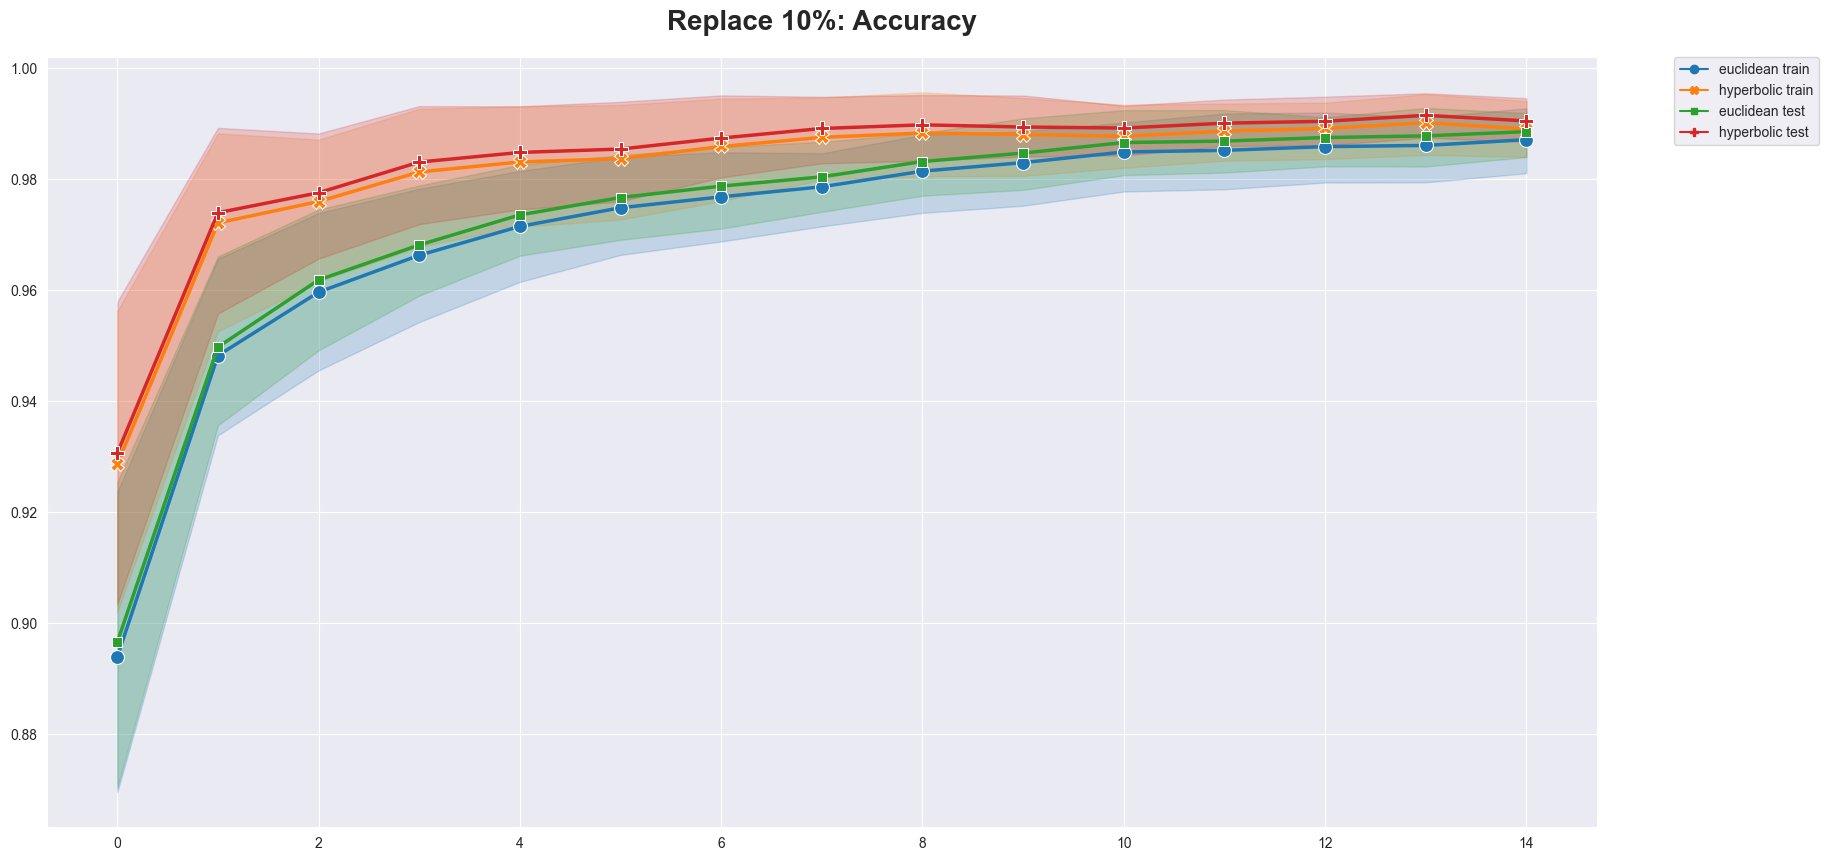

In [199]:
data = values(
    types="test",
    dataset="0",
    postives="0.5",
    replace="0.1",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Replace 10%: Accuracy", fontsize=20, fontweight="bold", pad=20)
plt.show()

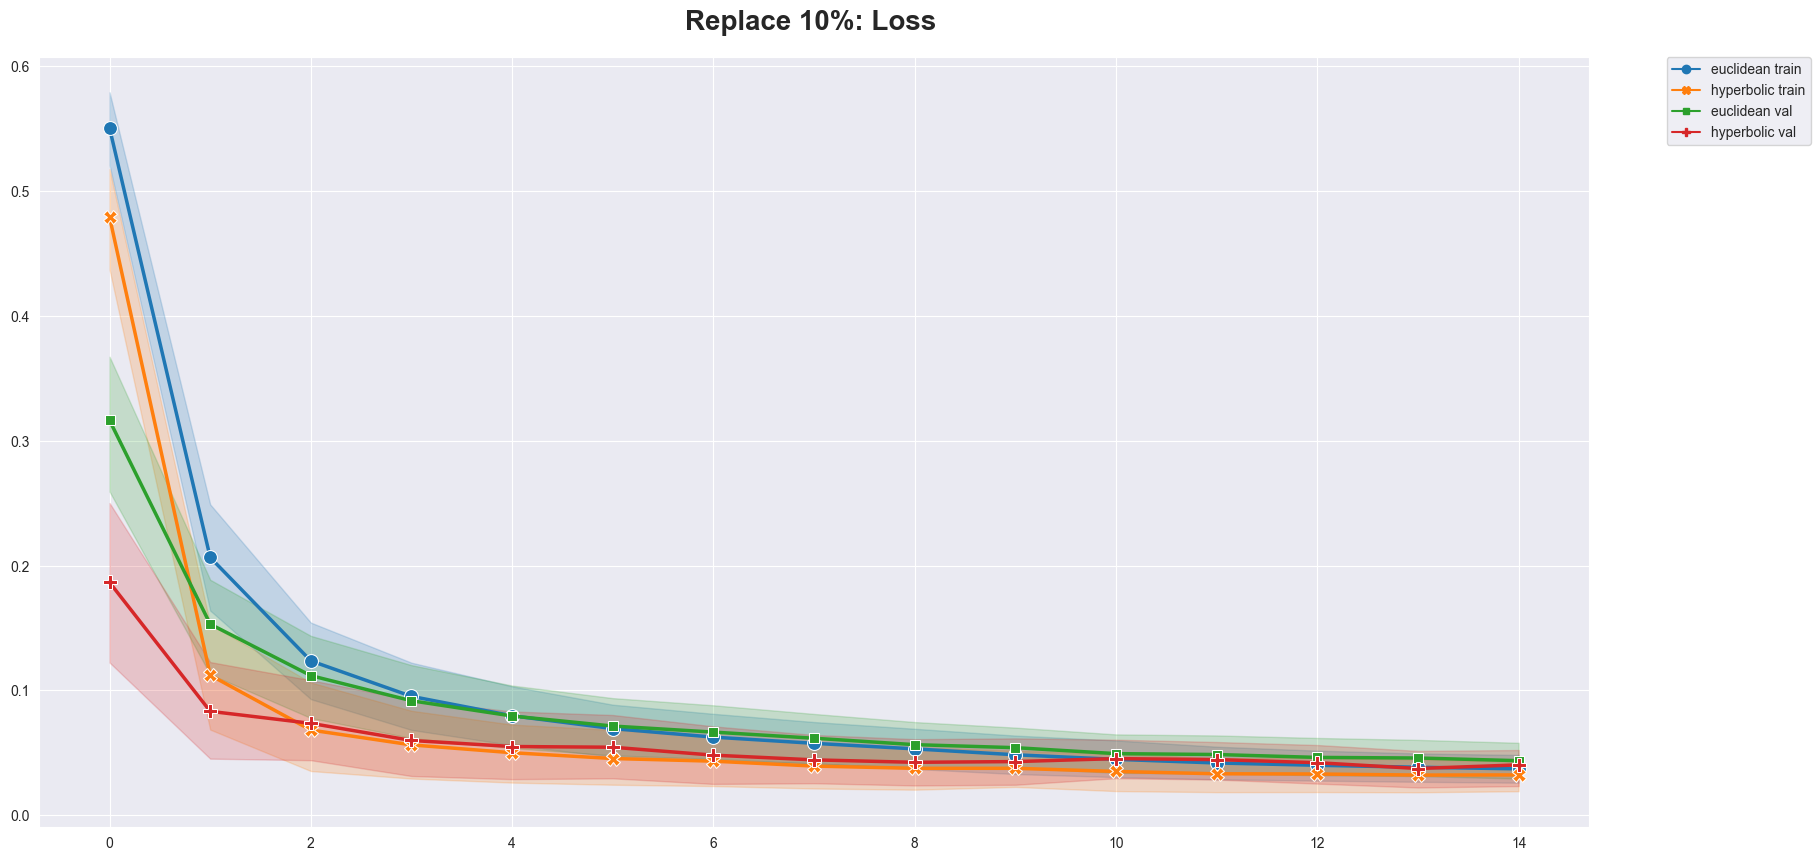

In [200]:
data = values(
    types="val",
    dataset="0",
    postives="0.5",
    replace="0.1",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Replace 10%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

###  Replace 30%

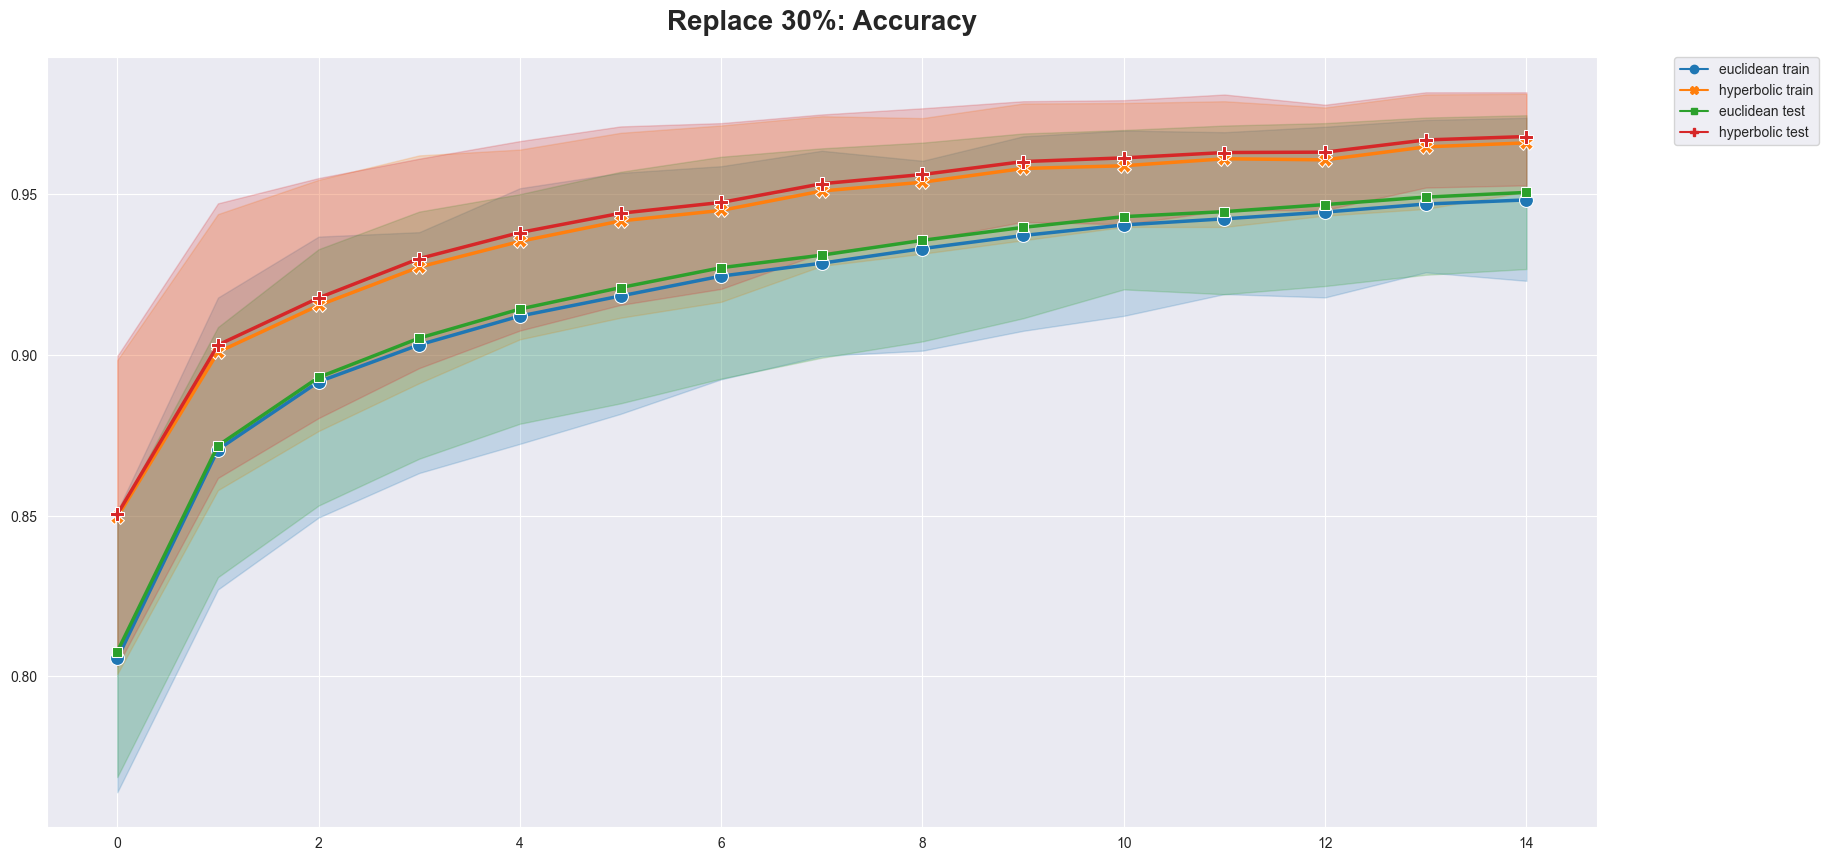

In [201]:
data = values(
    types="test",
    dataset="0",
    postives="0.5",
    replace="0.3",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Replace 30%: Accuracy", fontsize=20, fontweight="bold", pad=20)
plt.show()

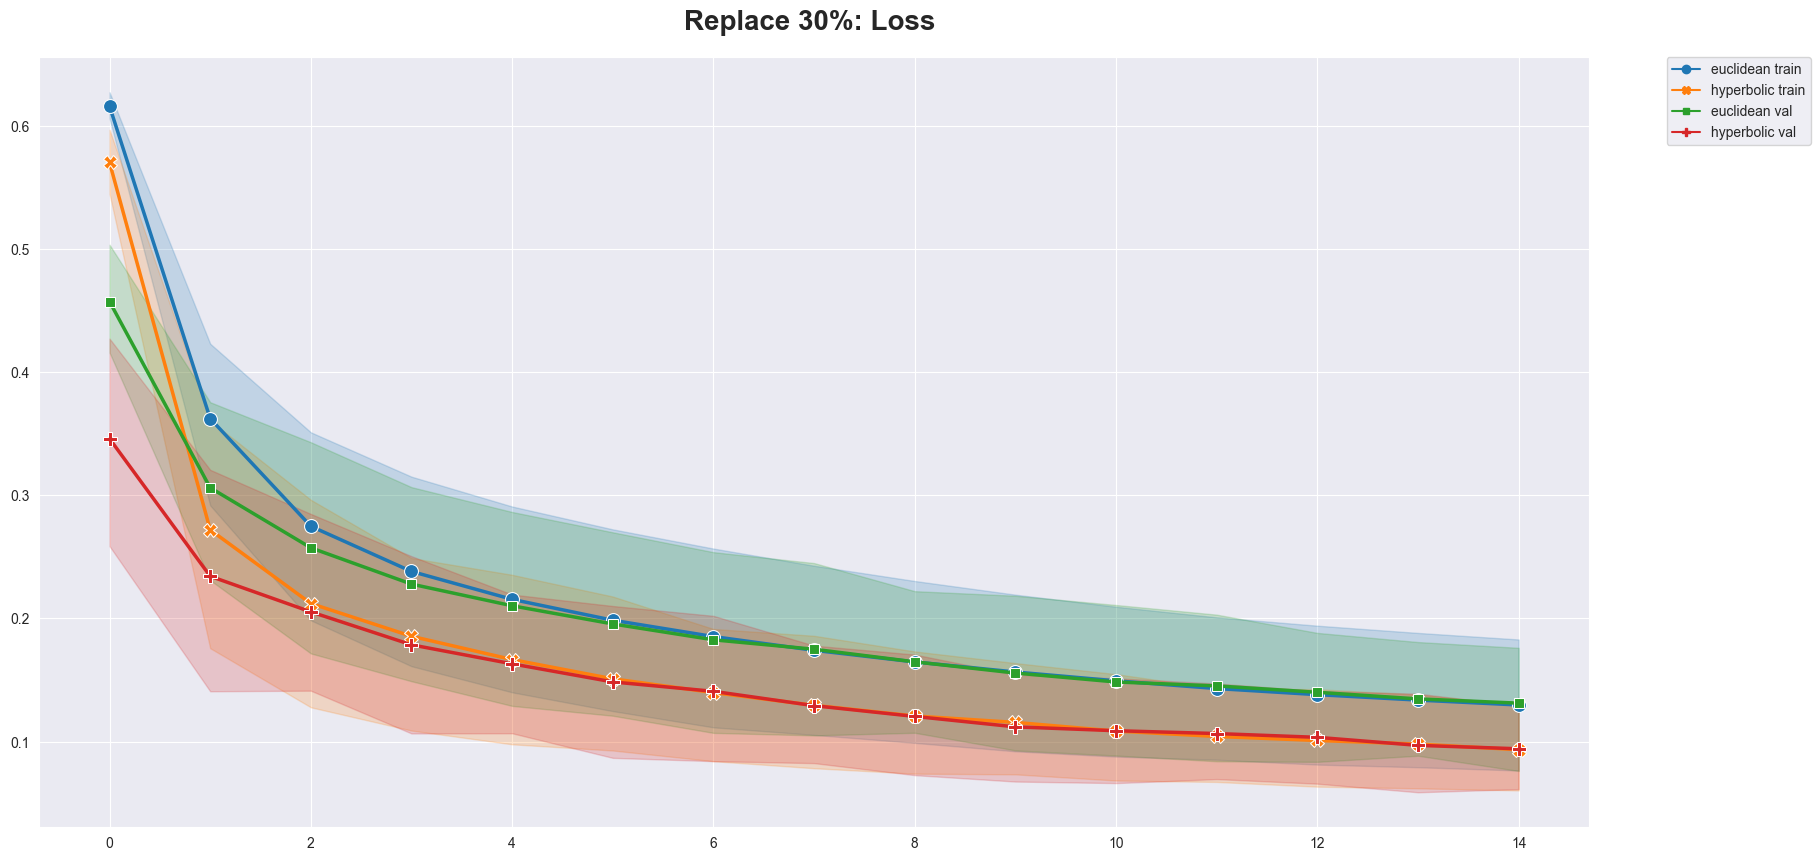

In [202]:
data = values(
    types="val",
    dataset="0",
    postives="0.5",
    replace="0.3",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Replace 30%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

###   ***Replace 50%***

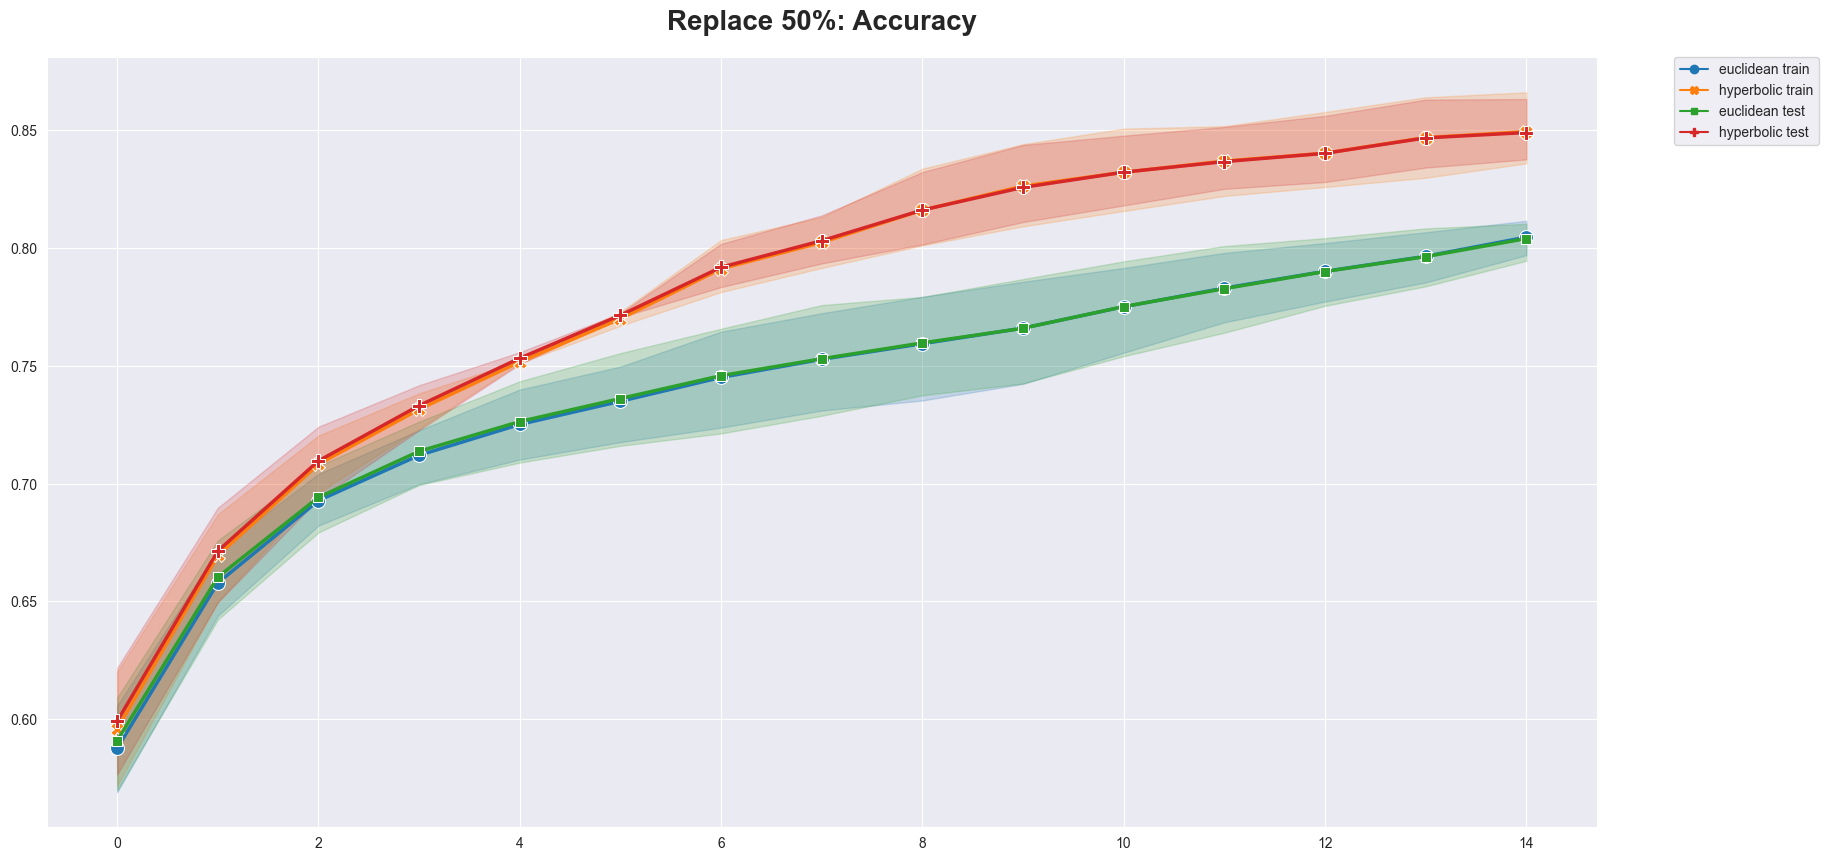

In [204]:
data = values(
    types="test",
    dataset="0",
    postives="0.5",
    replace="0.5",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Replace 50%: Accuracy", fontsize=20, fontweight="bold", pad=20)
plt.show()

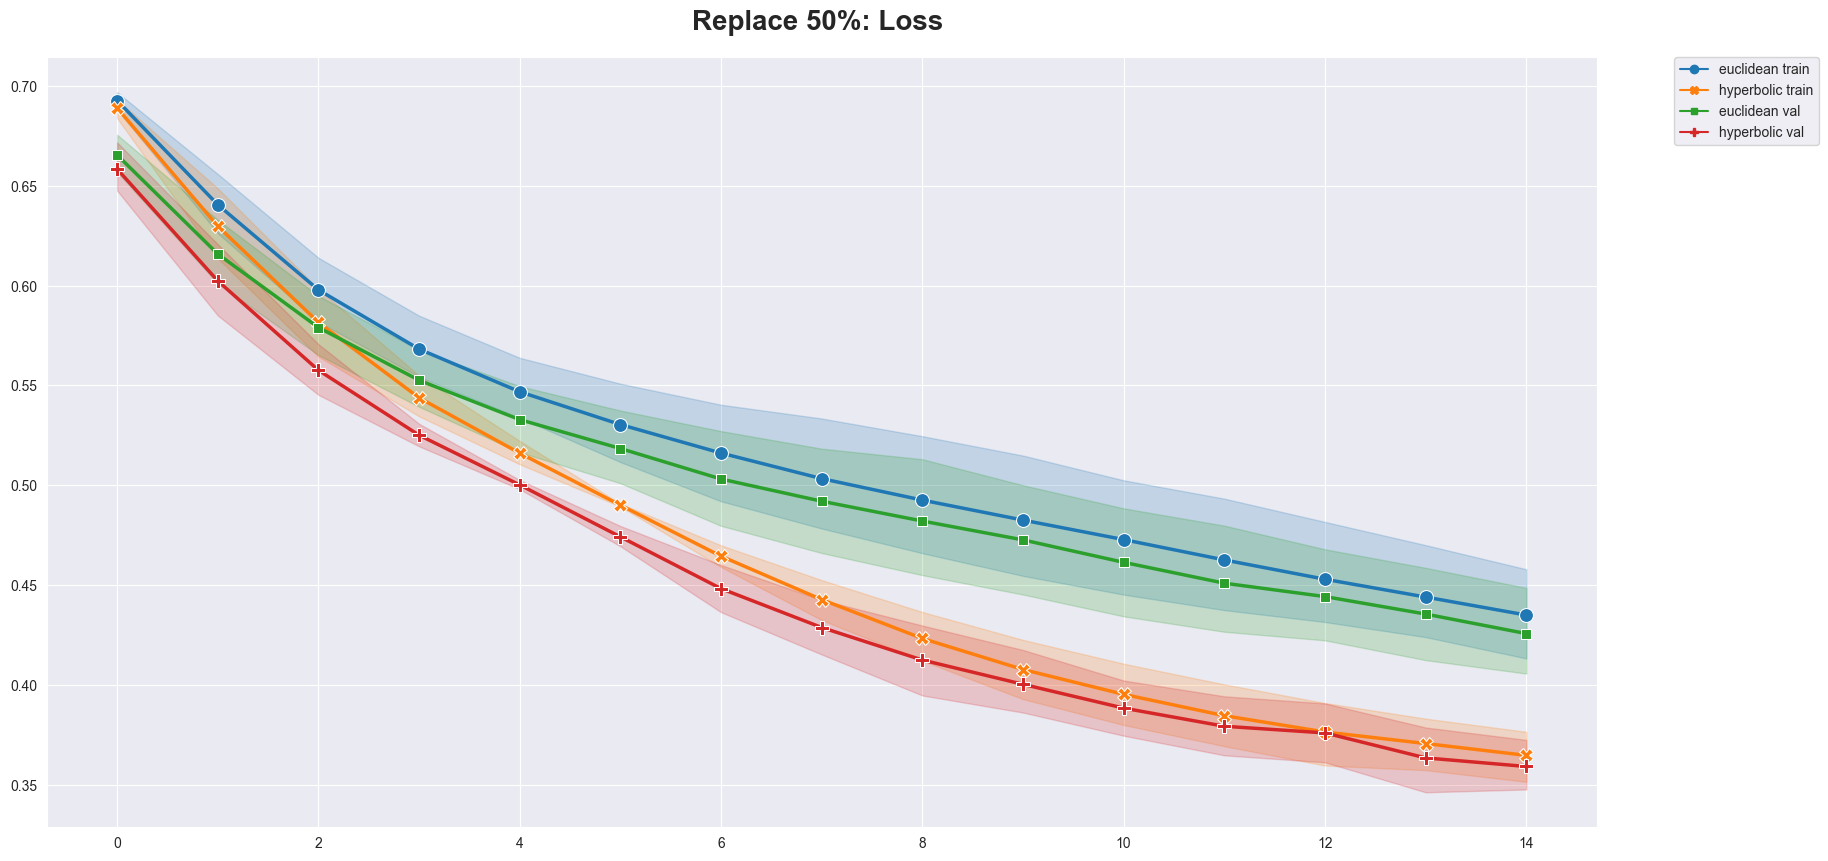

In [203]:
data = values(
    types="val",
    dataset="0",
    postives="0.5",
    replace="0.5",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Replace 50%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

### ***Replace 70%***

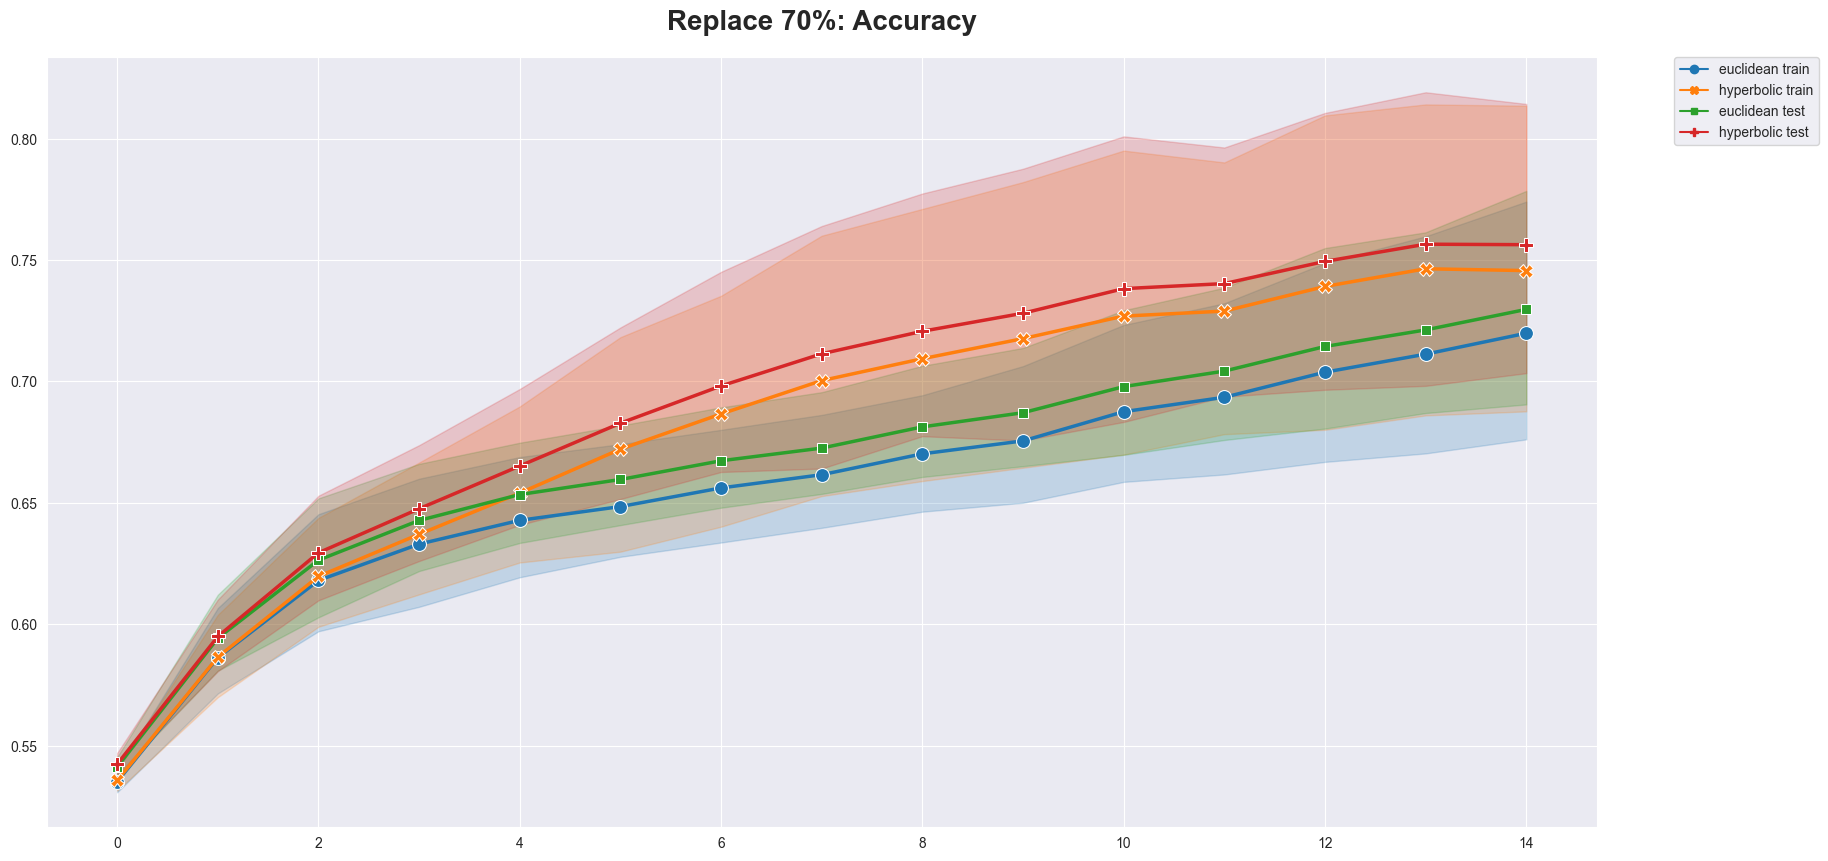

In [205]:
data = values(
    types="test",
    dataset="0",
    postives="0.5",
    replace="0.7",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Replace 70%: Accuracy", fontsize=20, fontweight="bold", pad=20)
plt.show()

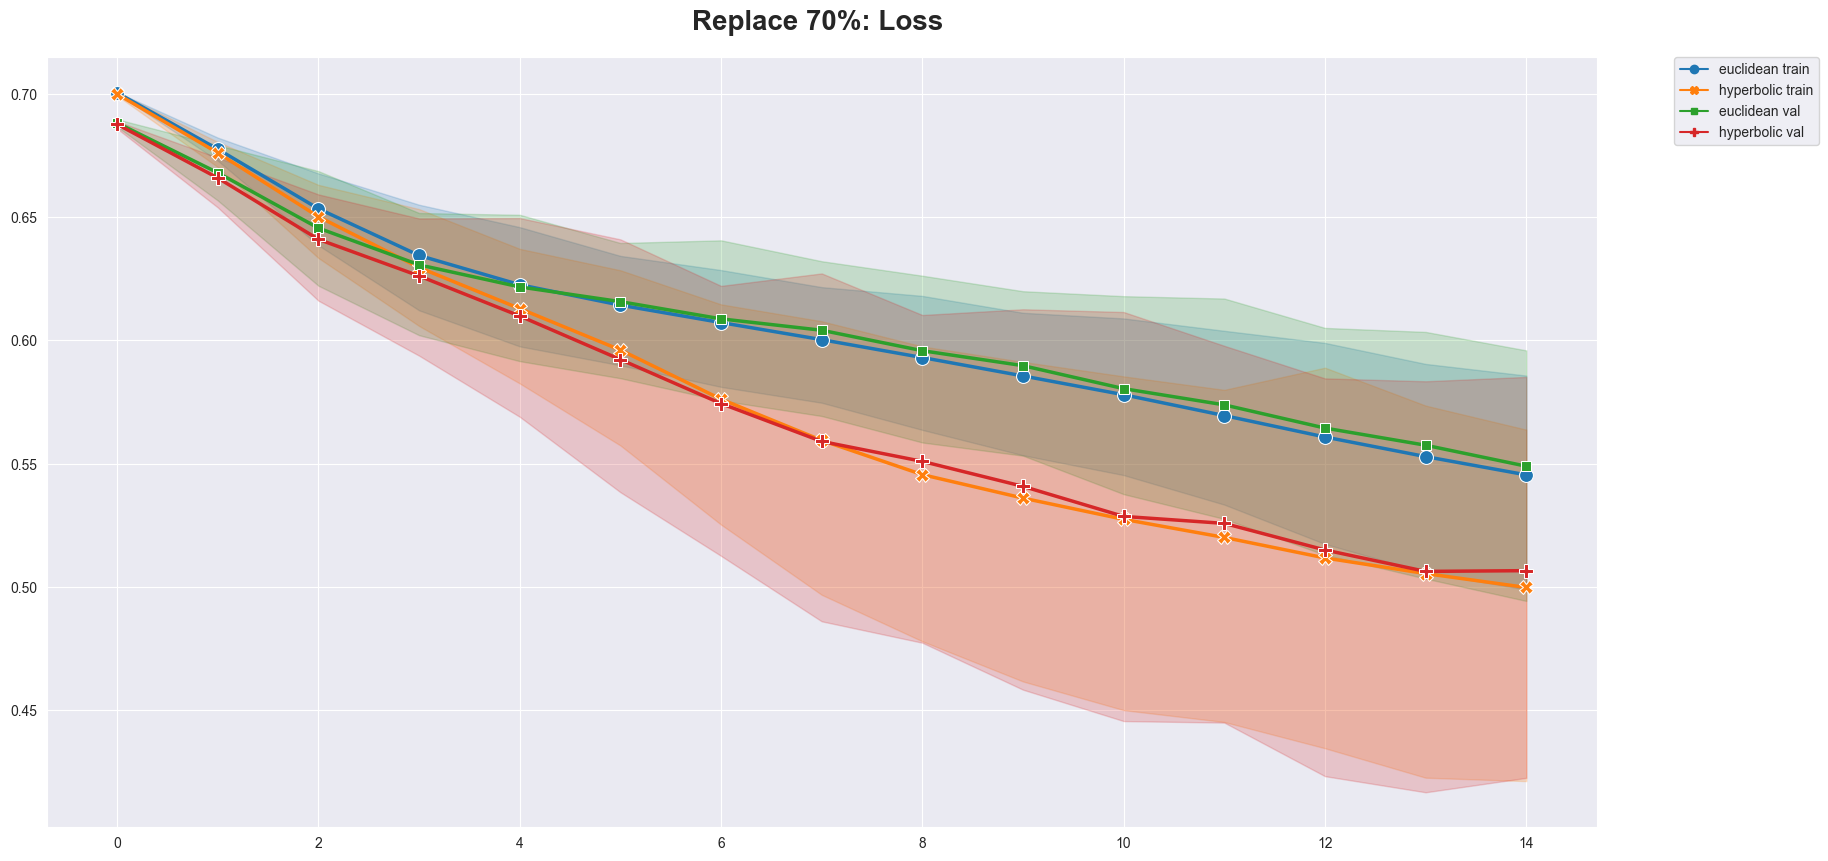

In [206]:
data = values(
    types="val",
    dataset="0",
    postives="0.5",
    replace="0.7",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Replace 70%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

## Comparation of Z-Prefix and Replace



### 1) ***Z-Prefix 10%*** 

 ####       I) *Replace 30%*
 
- in this case is the standard

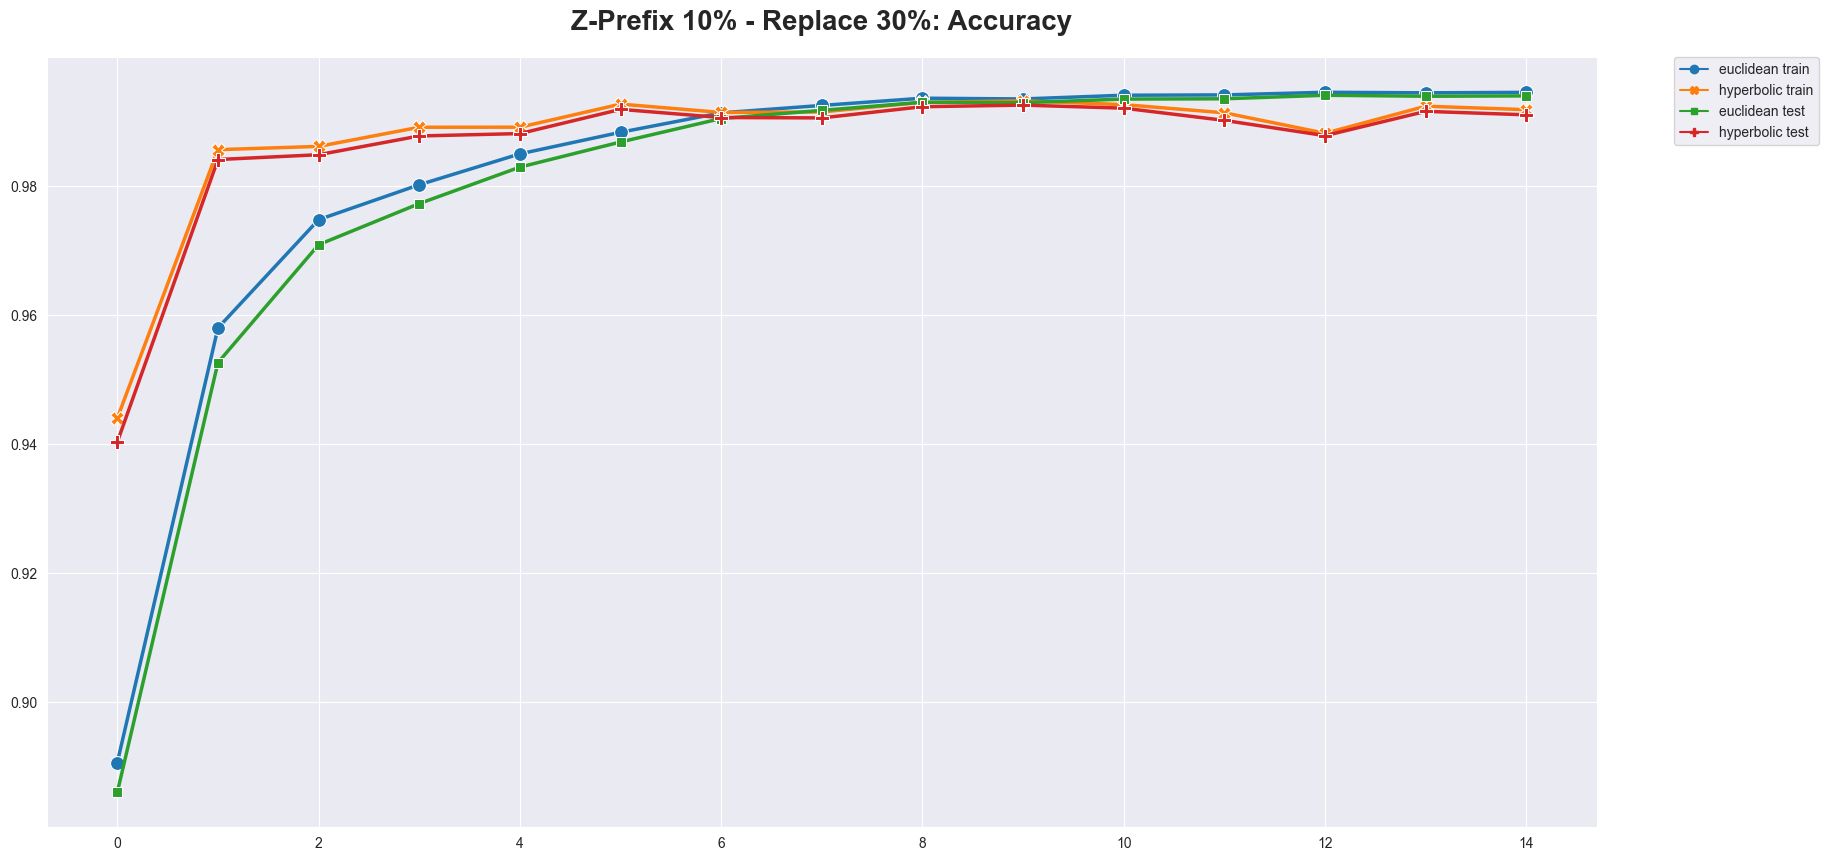

In [215]:
data = values(
    types="test",
    dataset="10",
    postives="0.5",
    replace="0.3",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 10% - Replace 30%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

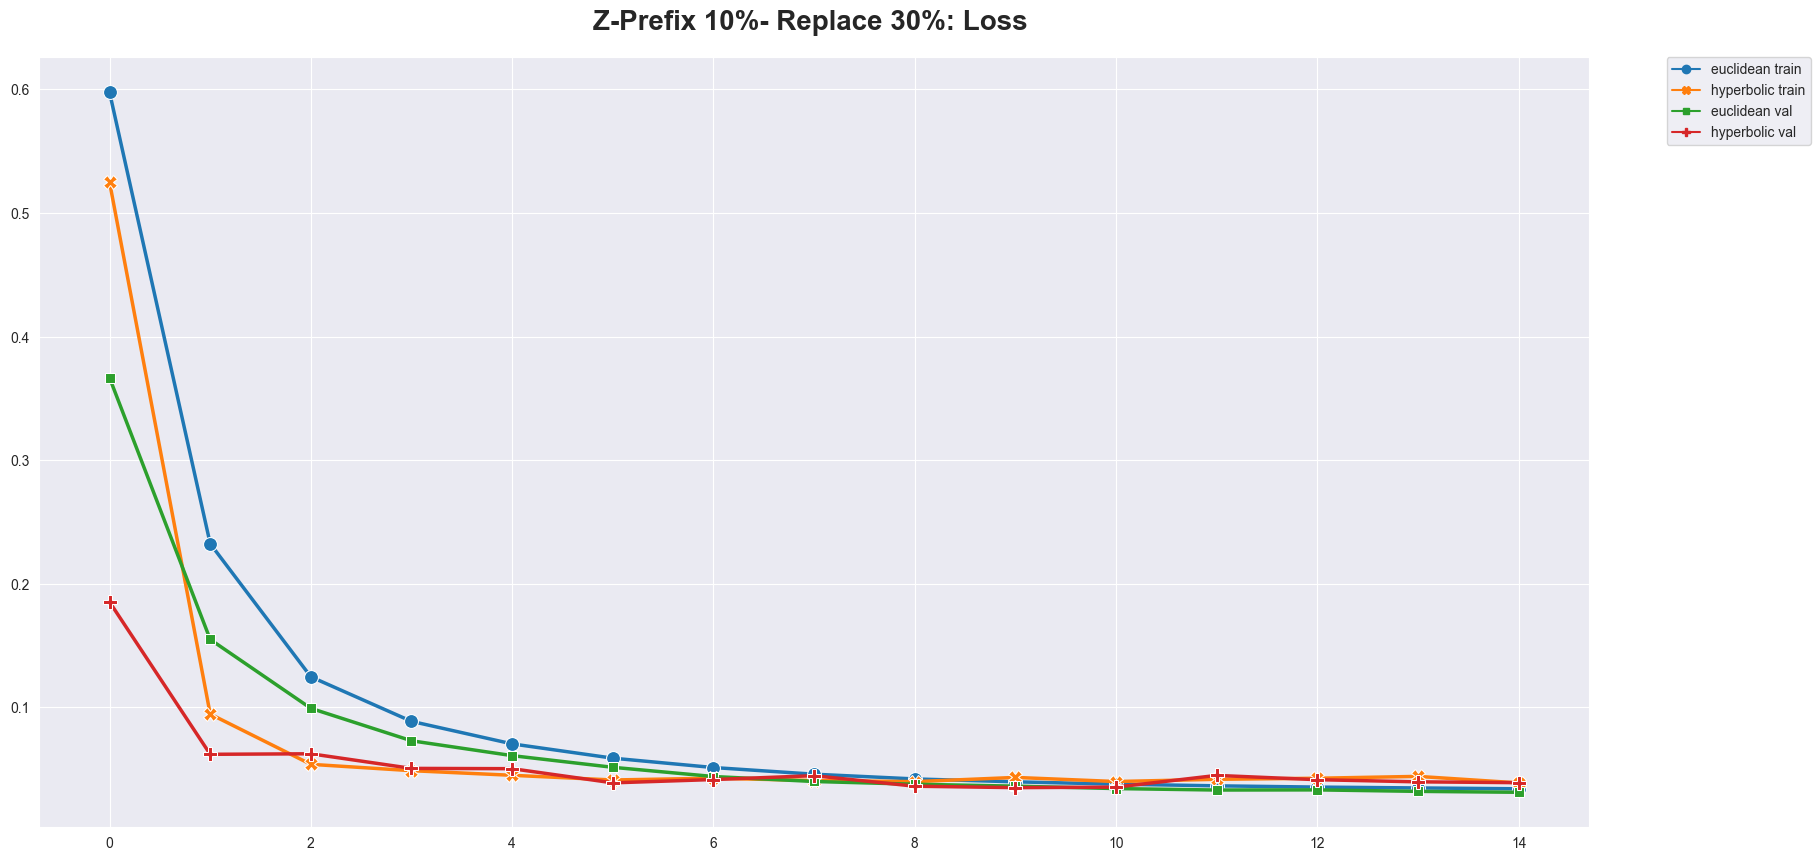

In [211]:
data = values(
    types="val",
    dataset="10",
    postives="0.5",
    replace="0.3",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 10%- Replace 30%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### II) *Replace 50%*

 - In this case is with only one character Changed

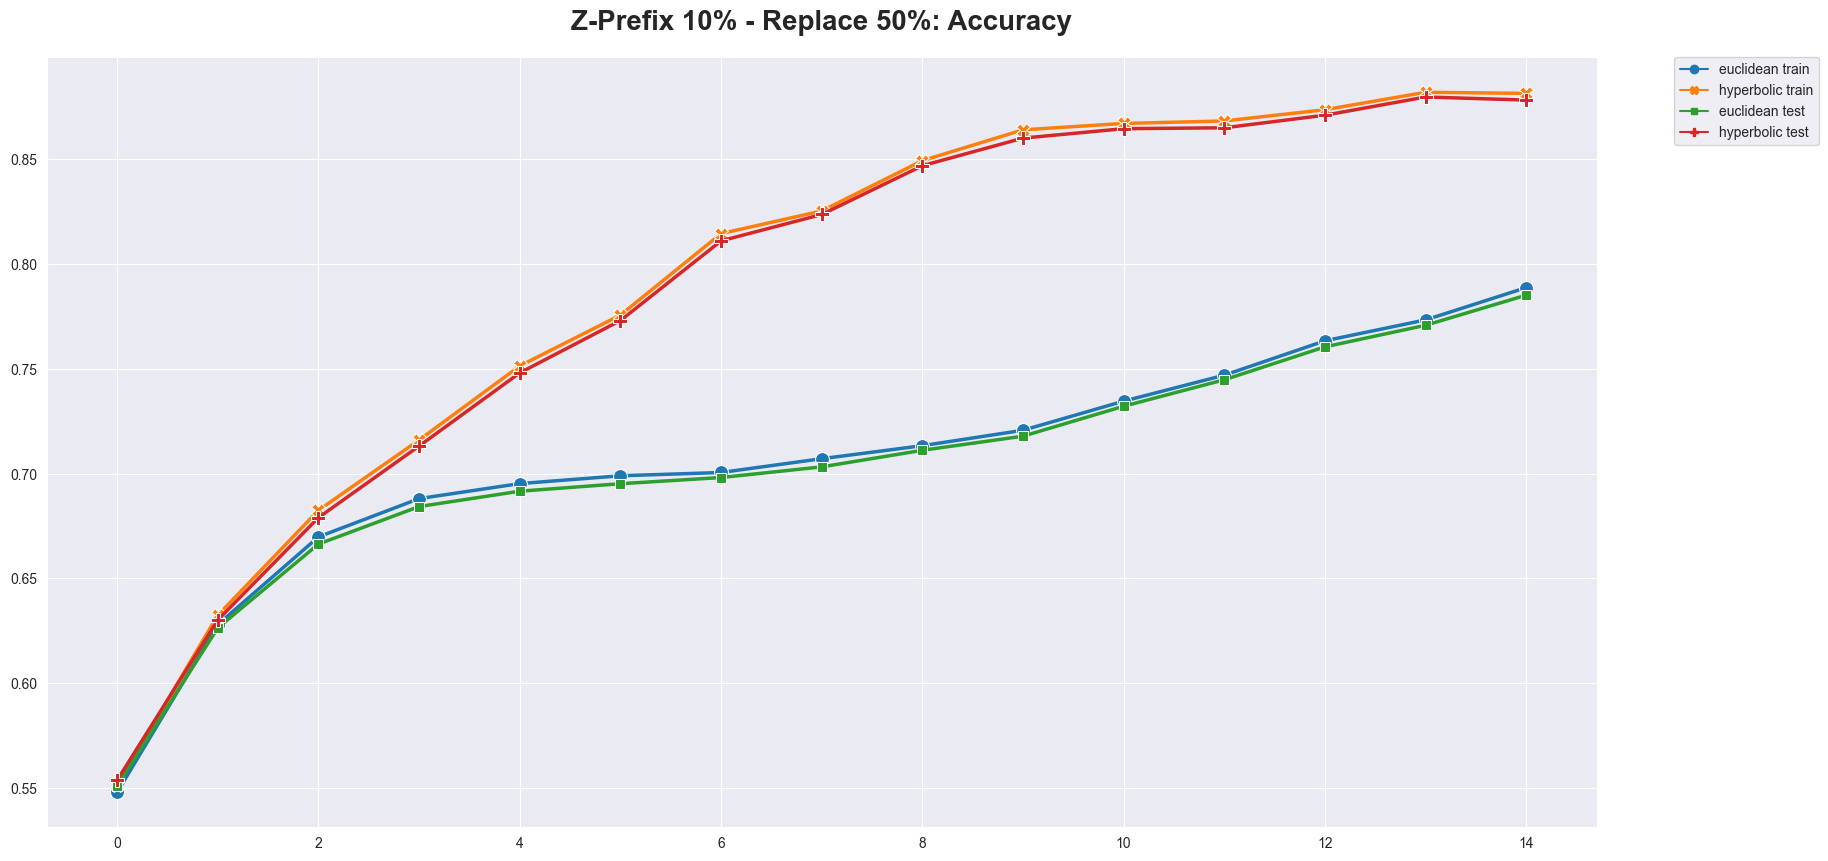

In [214]:
data = values(
    types="test",
    dataset="10",
    postives="0.5",
    replace="0.5",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 10% - Replace 50%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

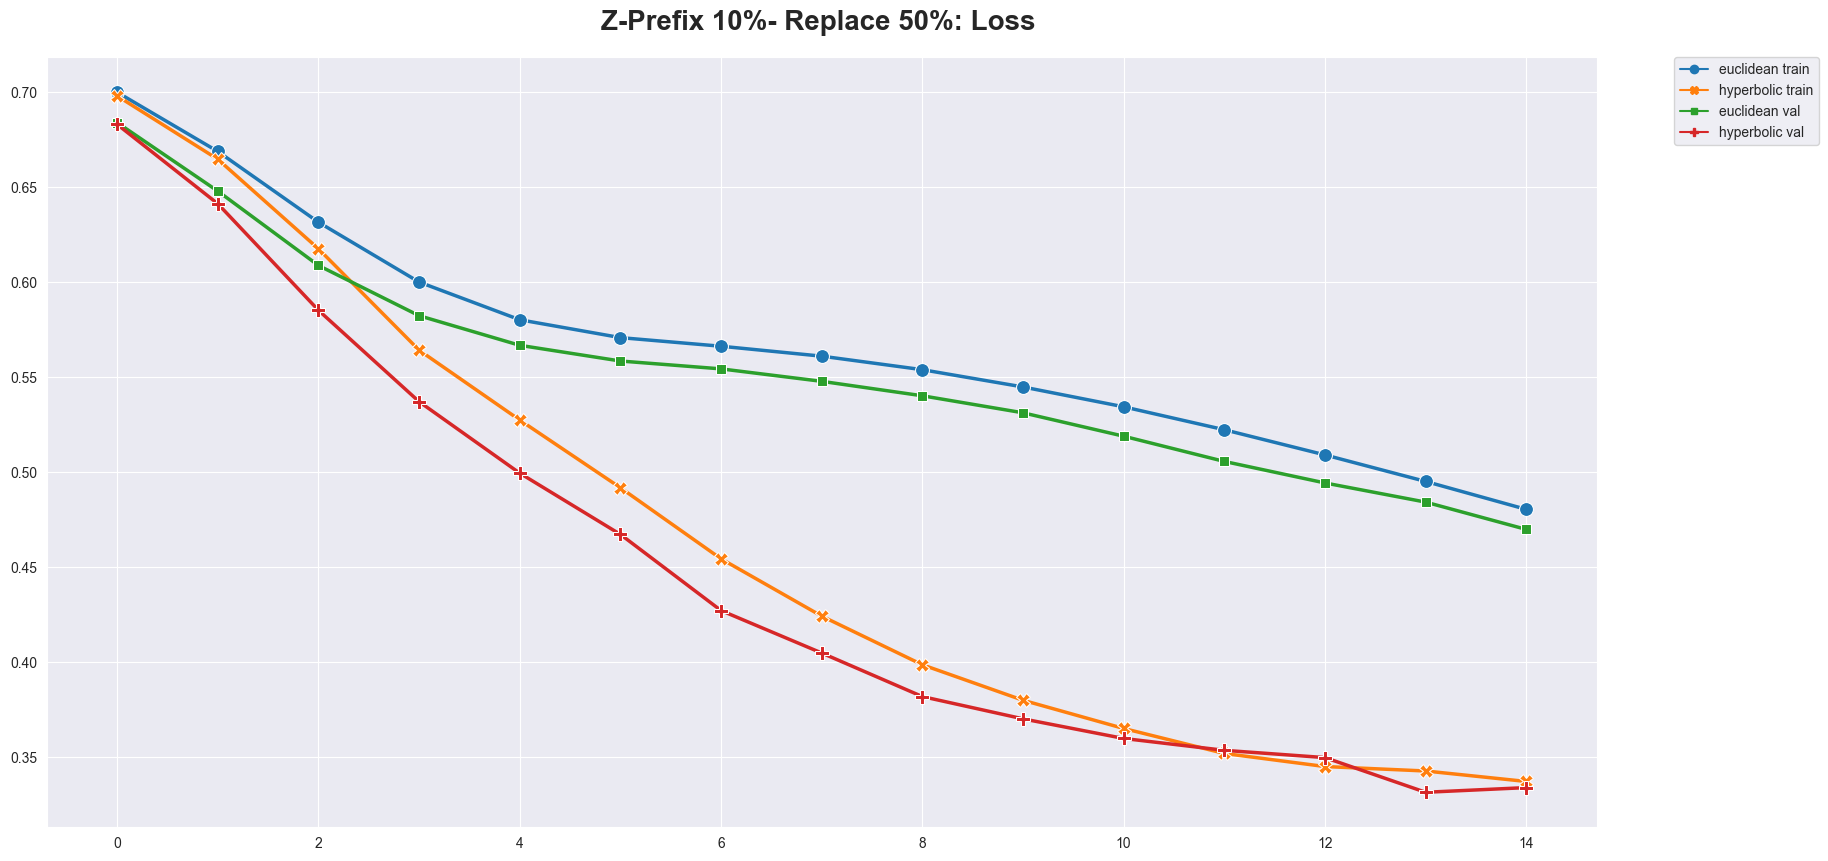

In [213]:
data = values(
    types="val",
    dataset="10",
    postives="0.5",
    replace="0.5",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 10%- Replace 50%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

### 2) ***Z-Prefix 30%***


#### I) *Replace 10%*

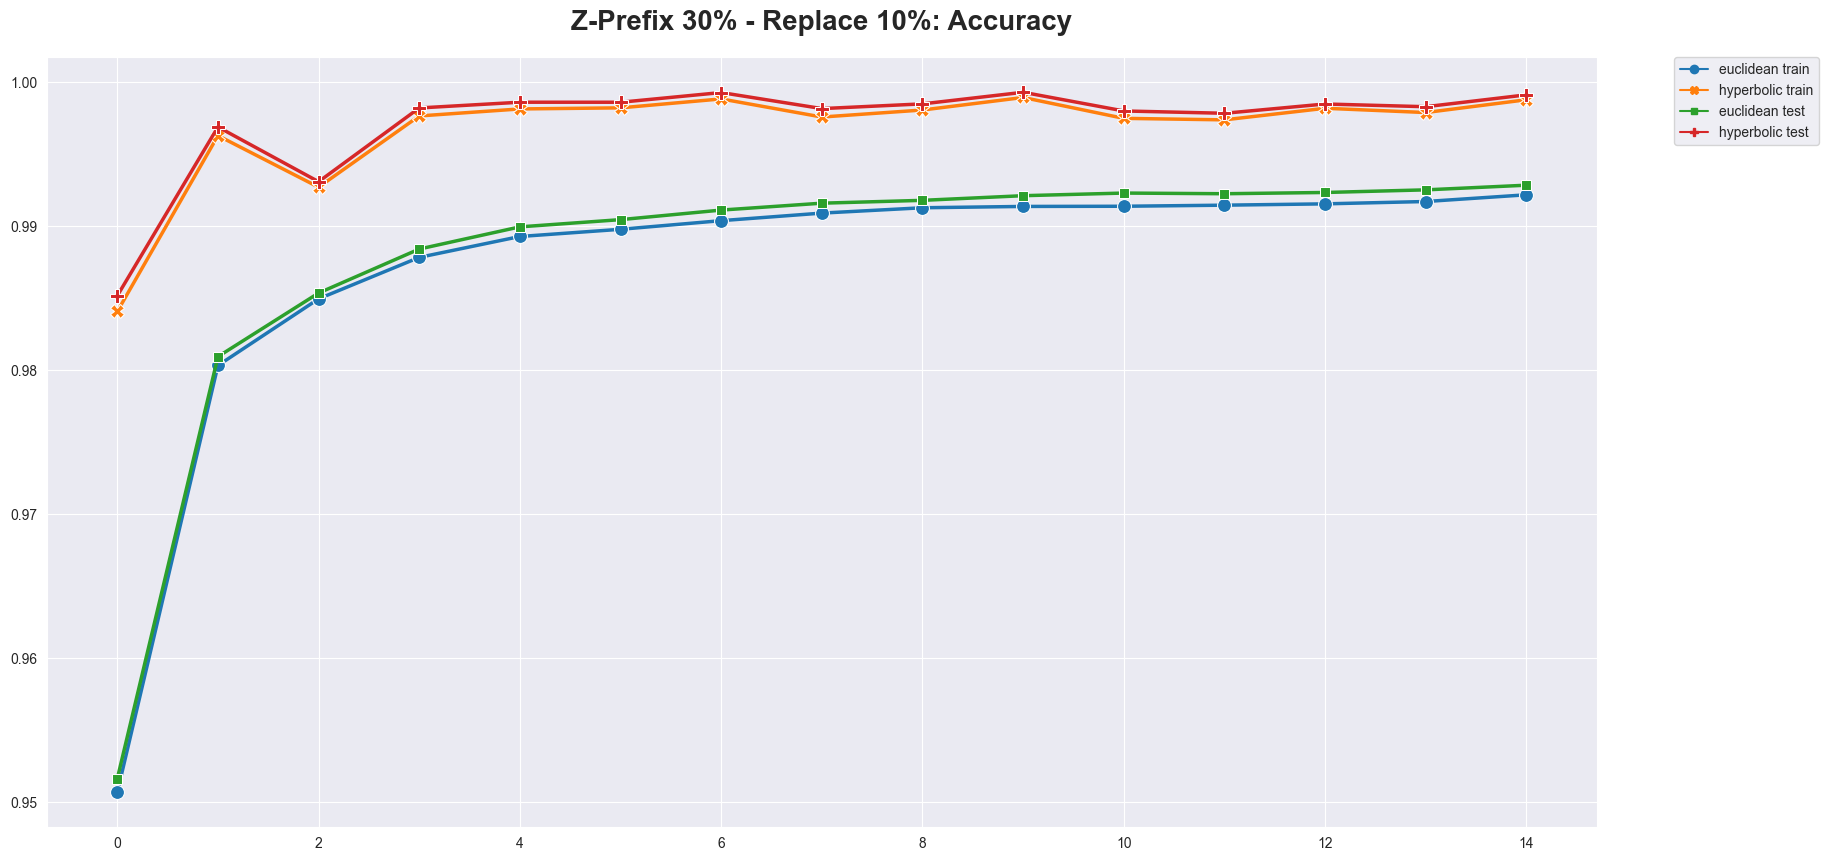

In [217]:
data = values(
    types="test",
    dataset="30",
    postives="0.5",
    replace="0.1",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 30% - Replace 10%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

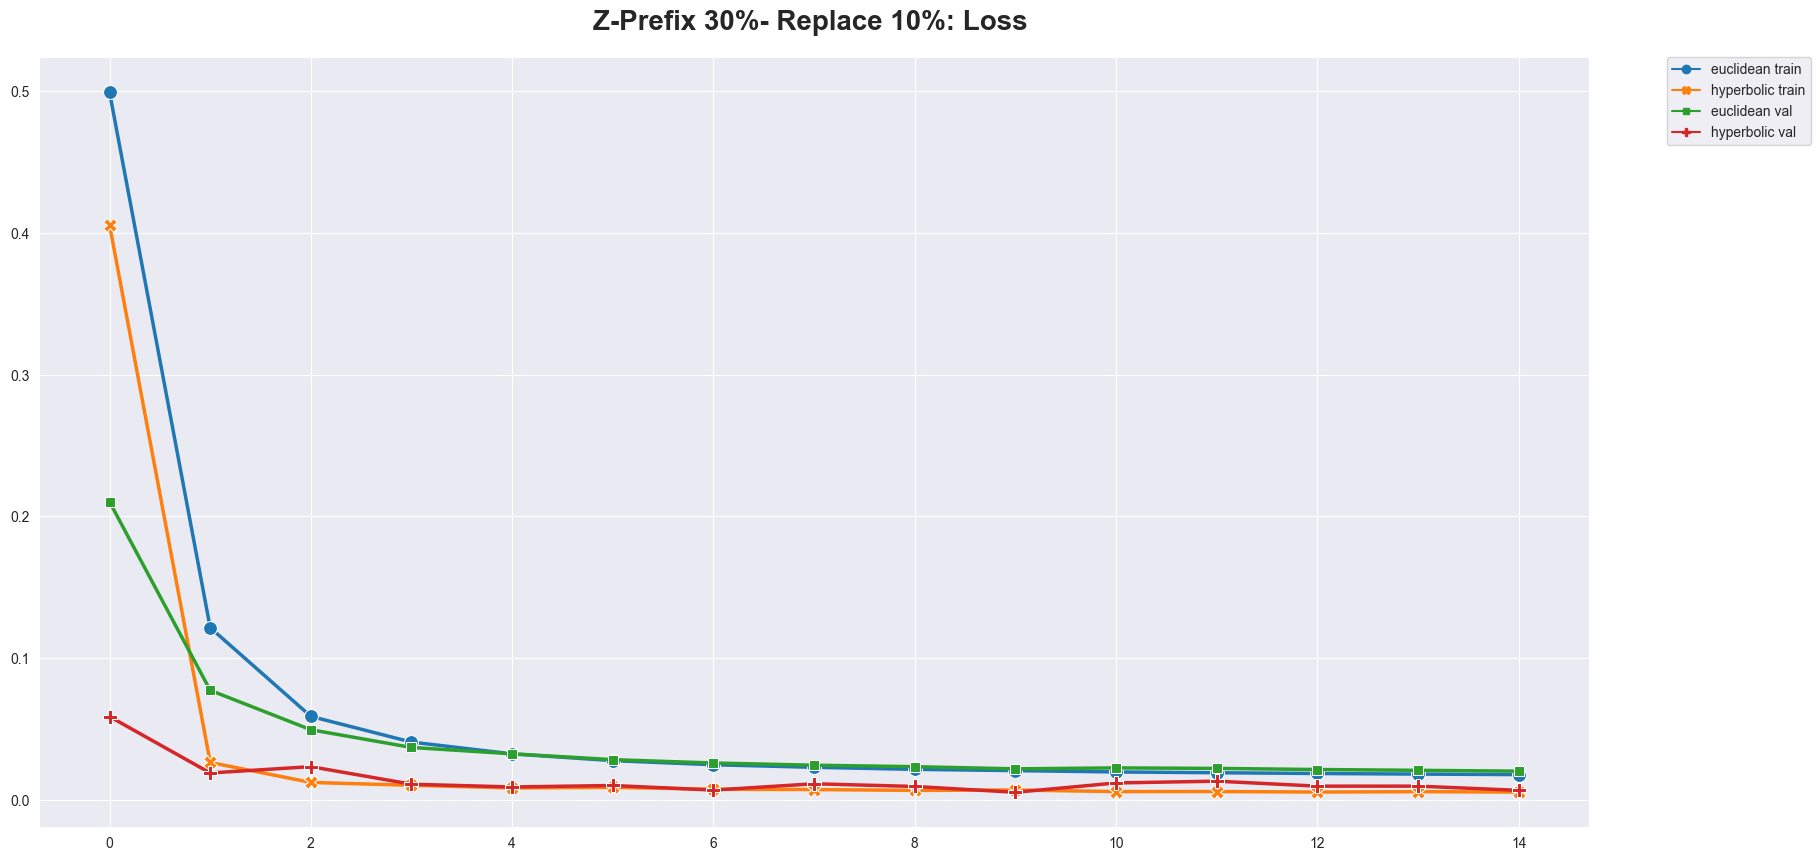

In [218]:
data = values(
    types="val",
    dataset="30",
    postives="0.5",
    replace="0.1",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 30%- Replace 10%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### II) *Replace 30%*

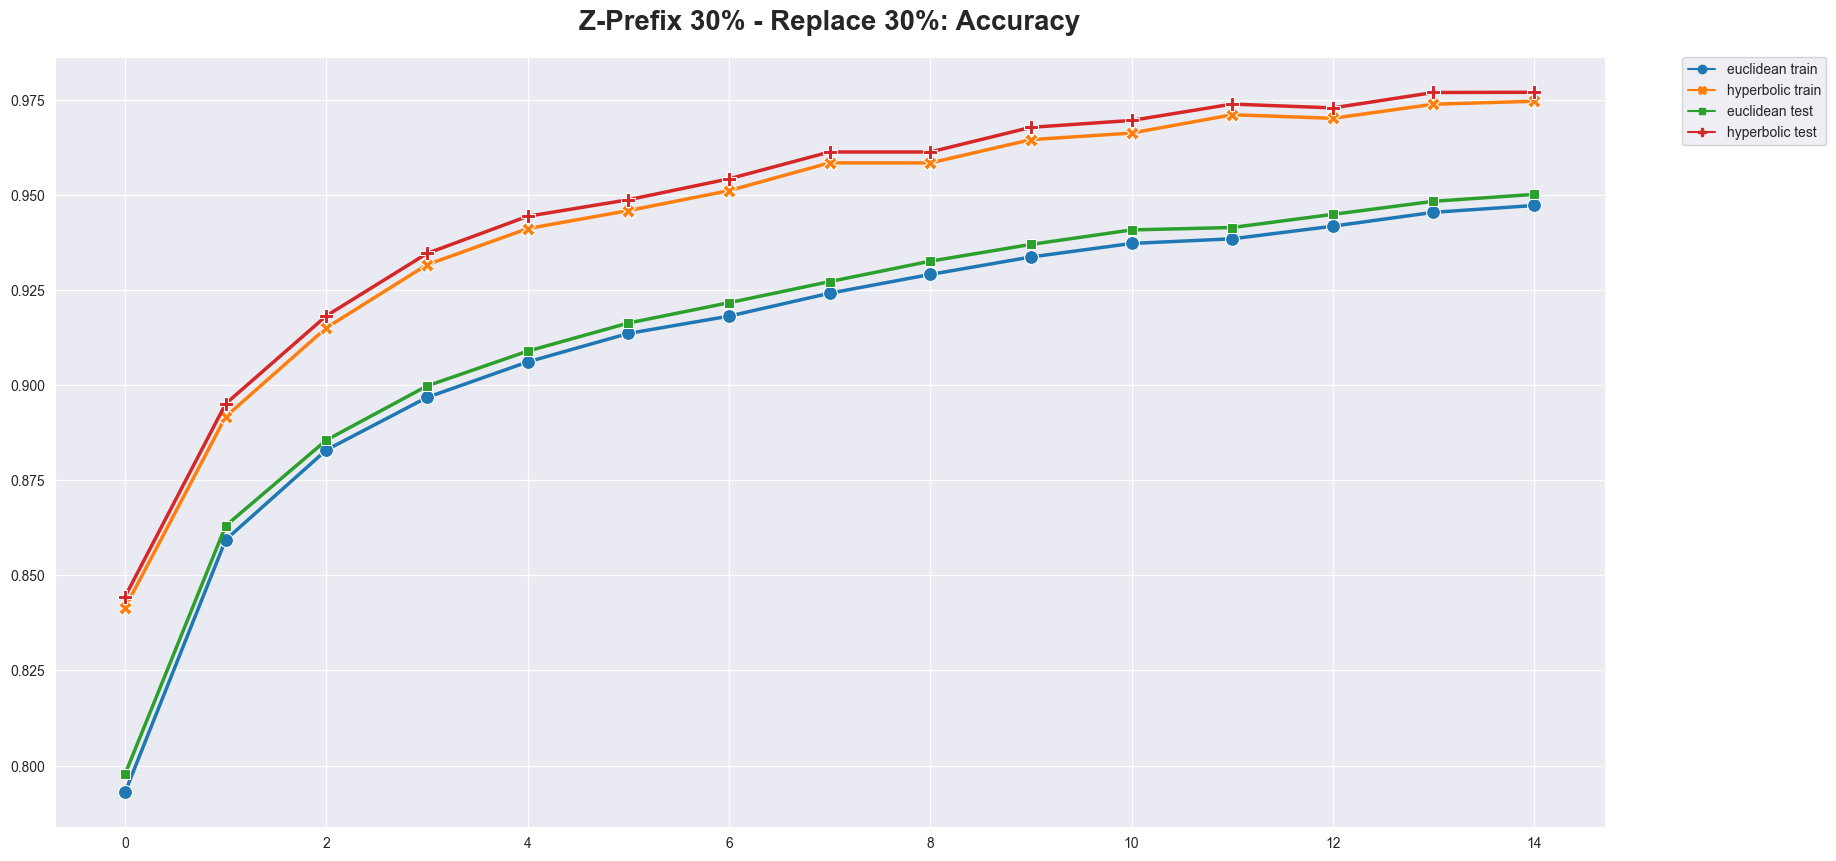

In [219]:
data = values(
    types="test",
    dataset="30",
    postives="0.5",
    replace="0.3",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 30% - Replace 30%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

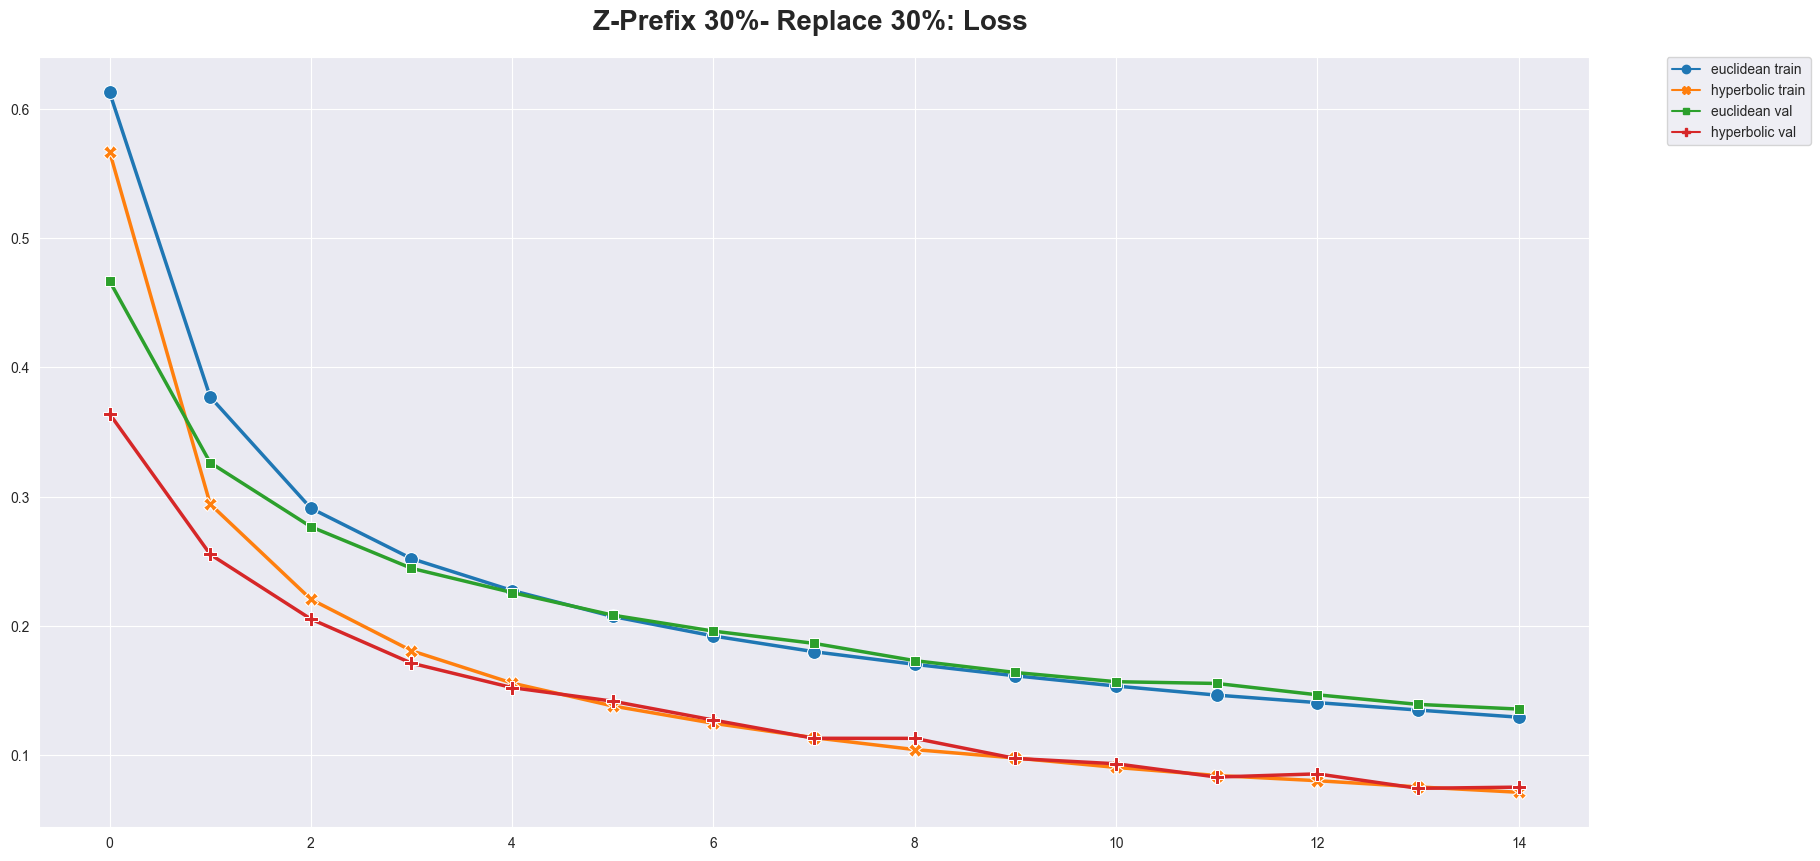

In [270]:
data = values(
    types="val",
    dataset="30",
    postives="0.5",
    replace="0.3",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 30%- Replace 30%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### III) *Replace 50%*

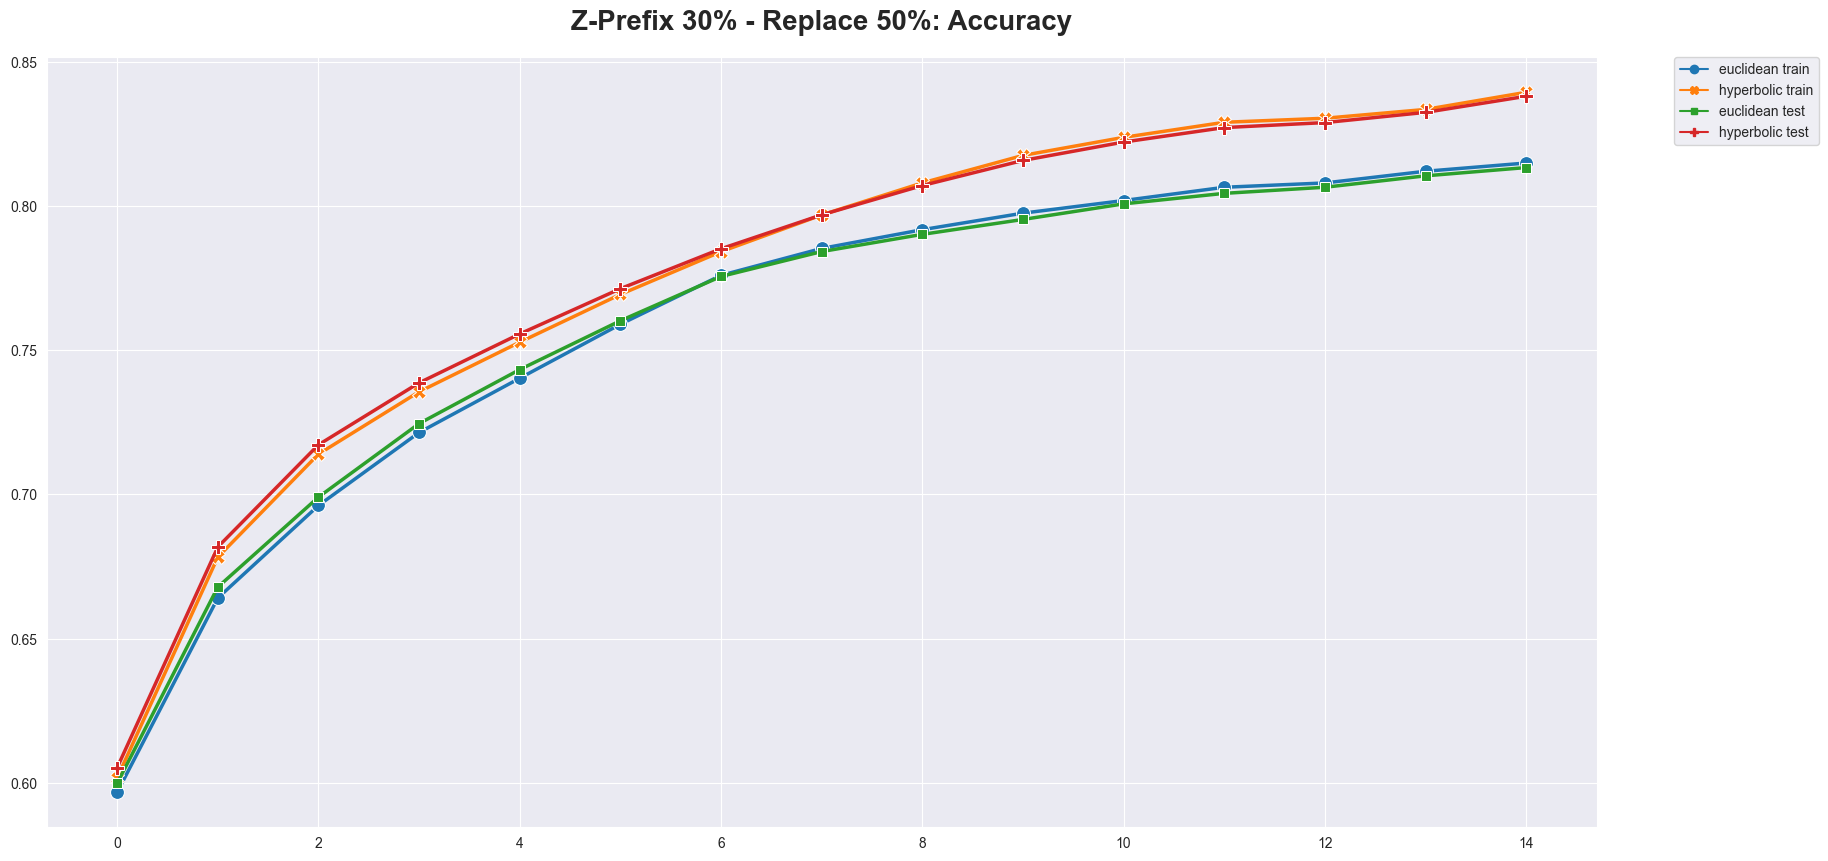

In [221]:
data = values(
    types="test",
    dataset="30",
    postives="0.5",
    replace="0.5",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 30% - Replace 50%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

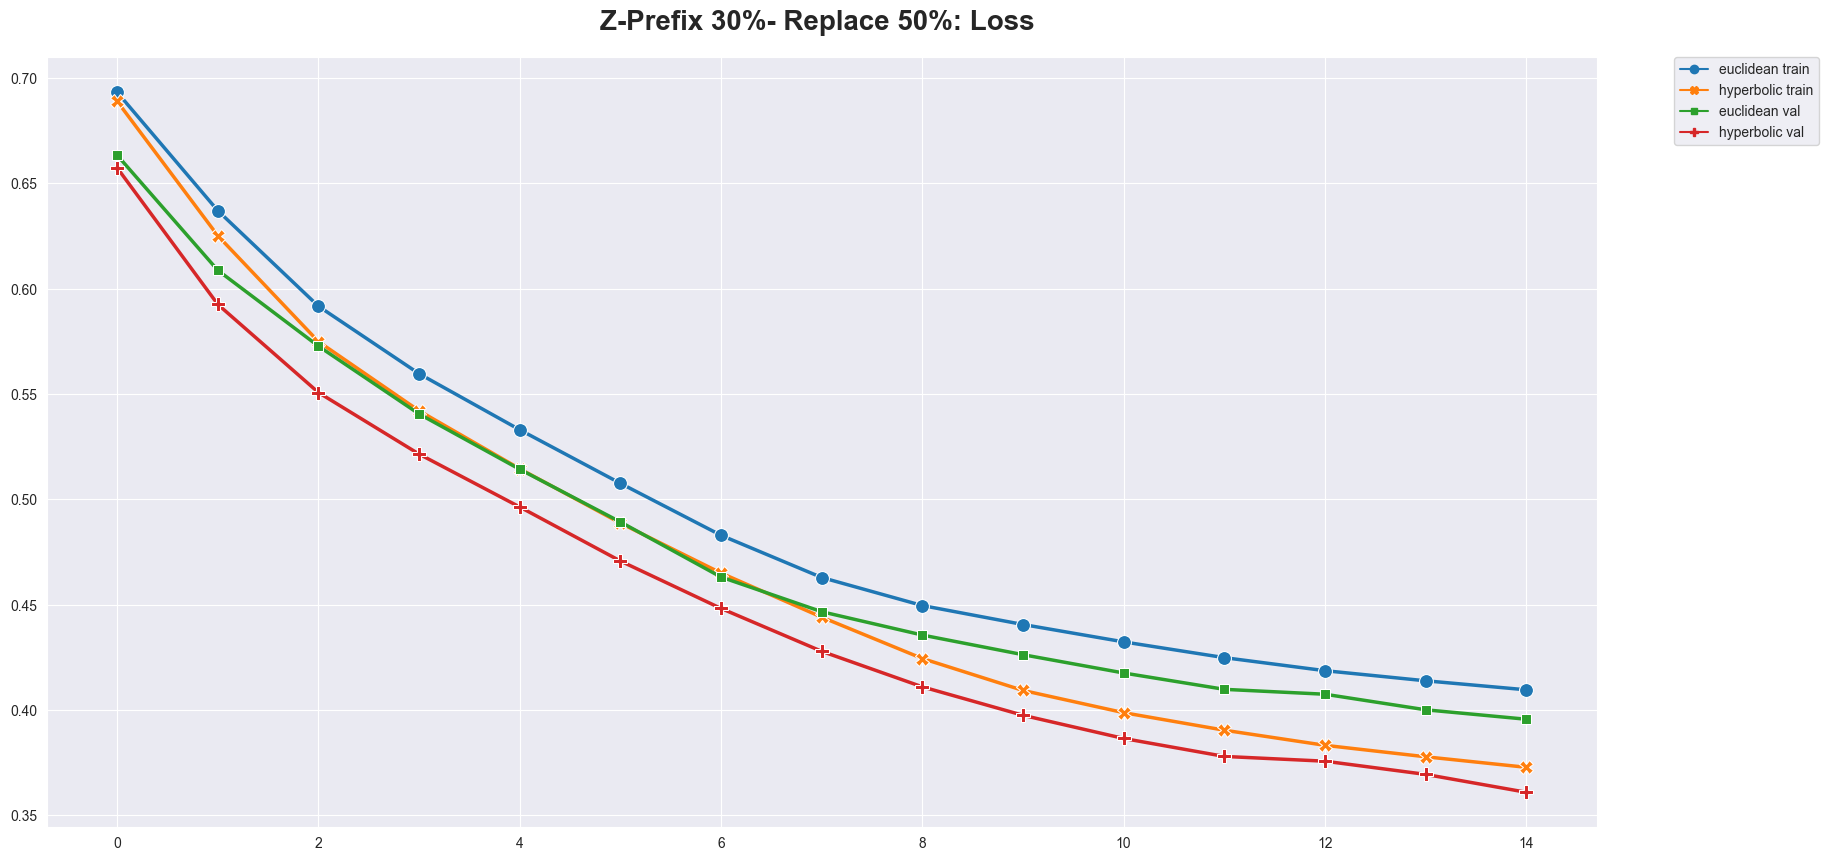

In [222]:
data = values(
    types="val",
    dataset="30",
    postives="0.5",
    replace="0.5",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 30%- Replace 50%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### IV) *Replace 70%*

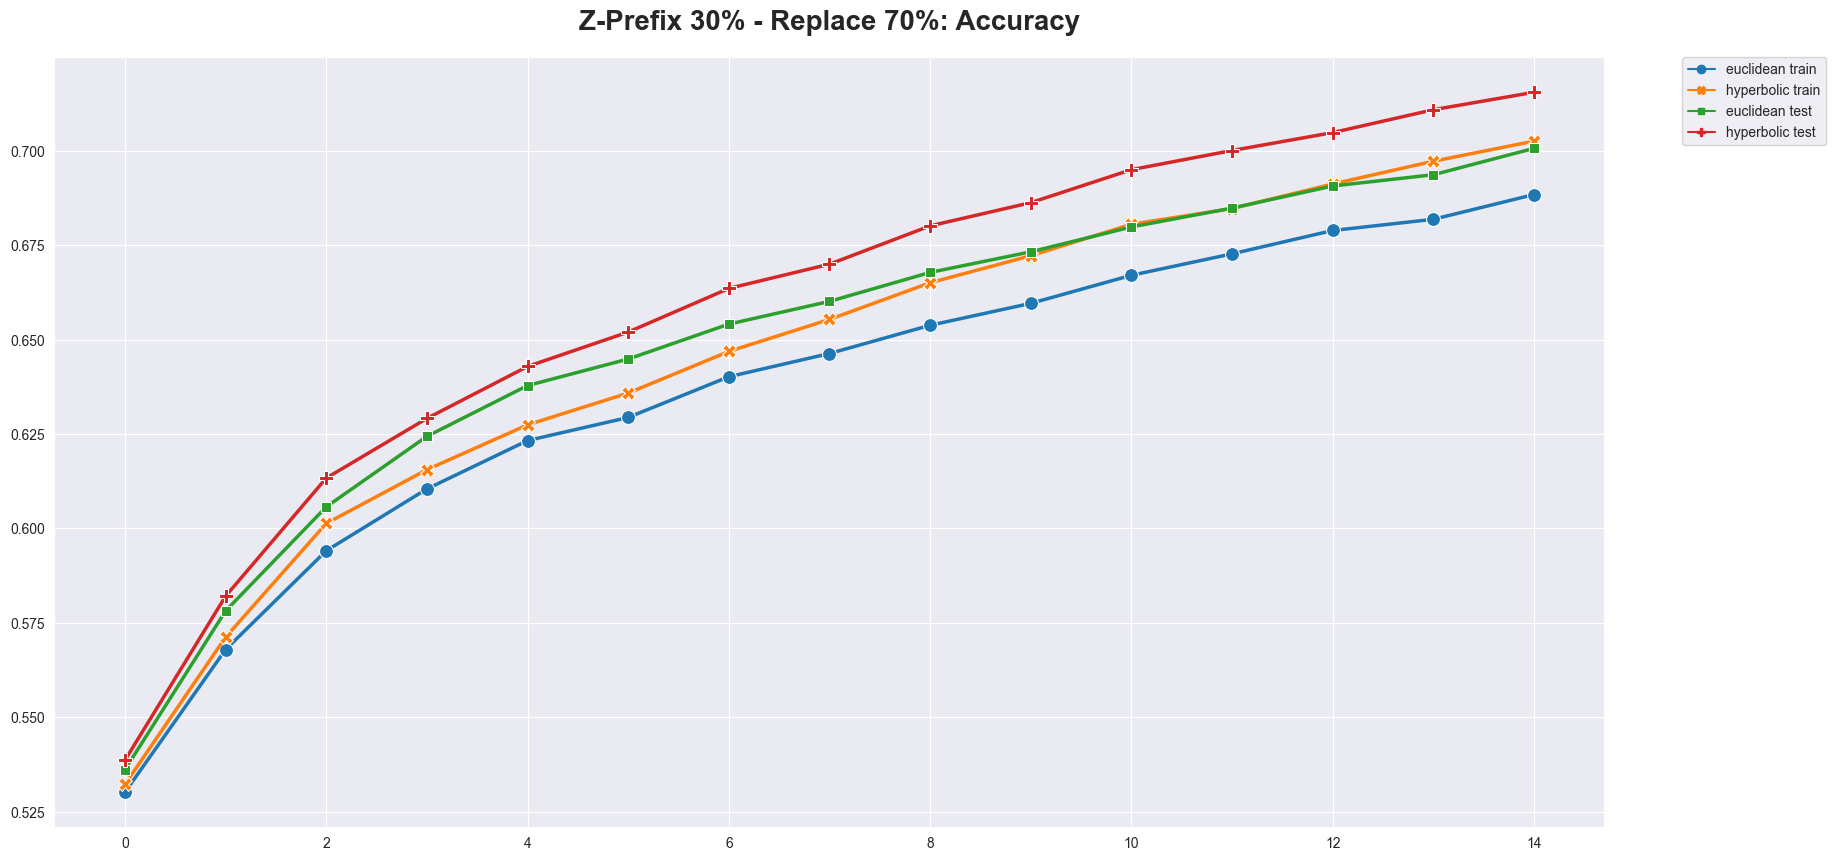

In [229]:
data = values(
    types="test",
    dataset="30",
    postives="0.5",
    replace="0.7",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 30% - Replace 70%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

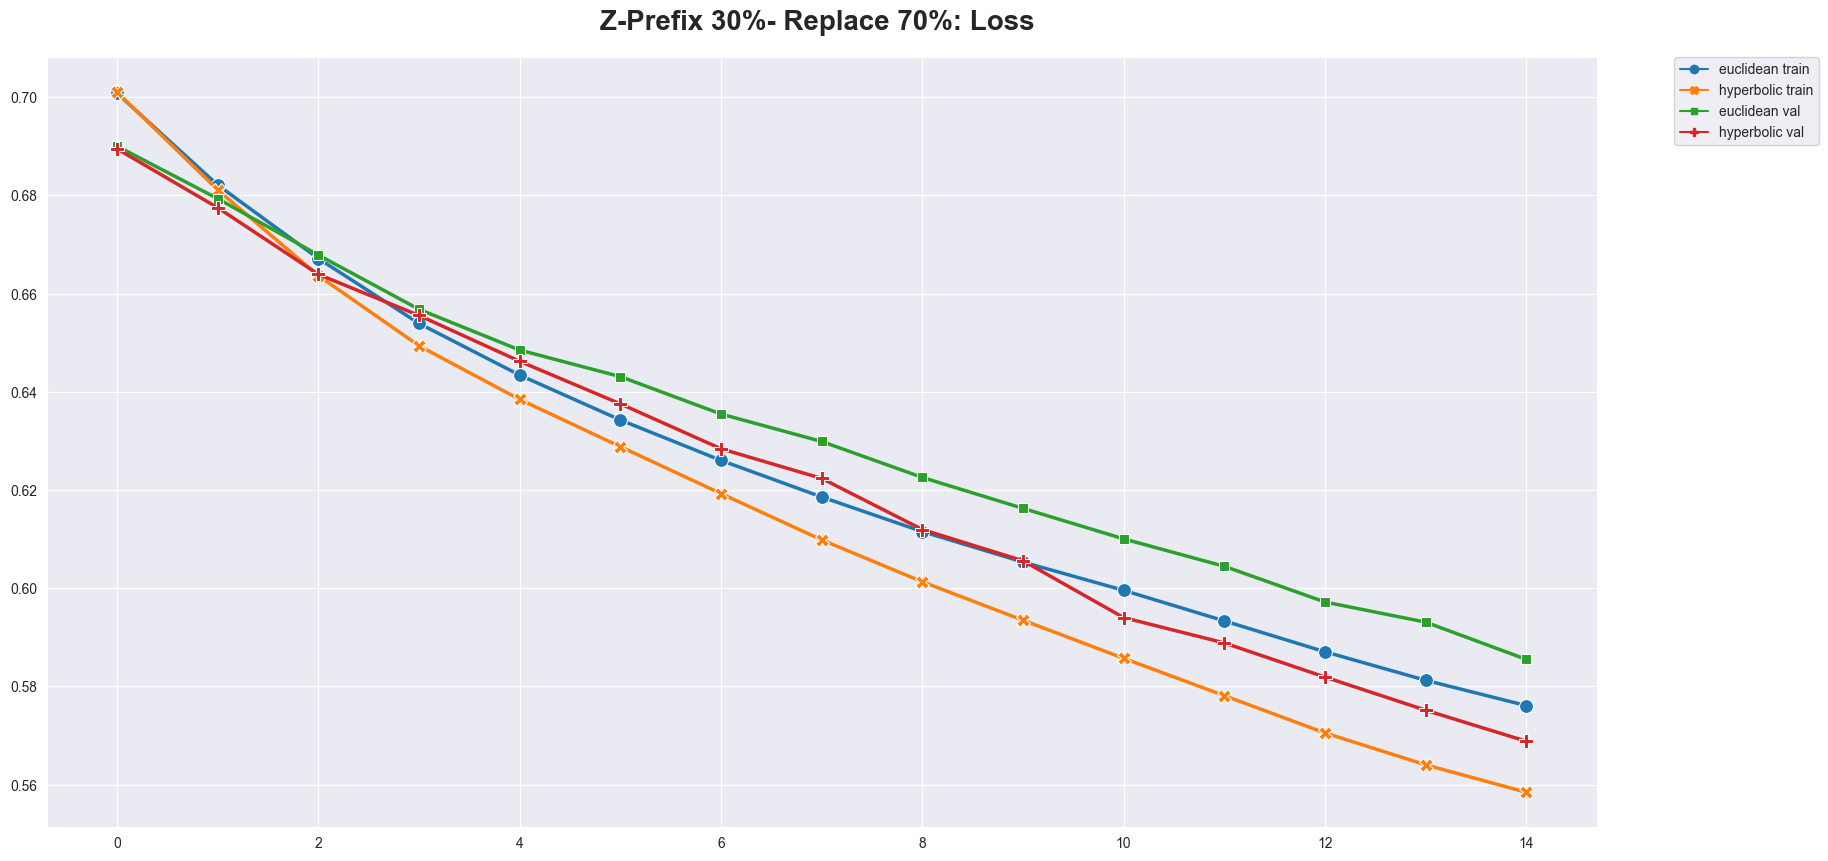

In [231]:
data = values(
    types="val",
    dataset="30",
    postives="0.5",
    replace="0.7",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 30%- Replace 70%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

### 3) ***Z-Prefix 50%***


#### I) *Replace 10%*

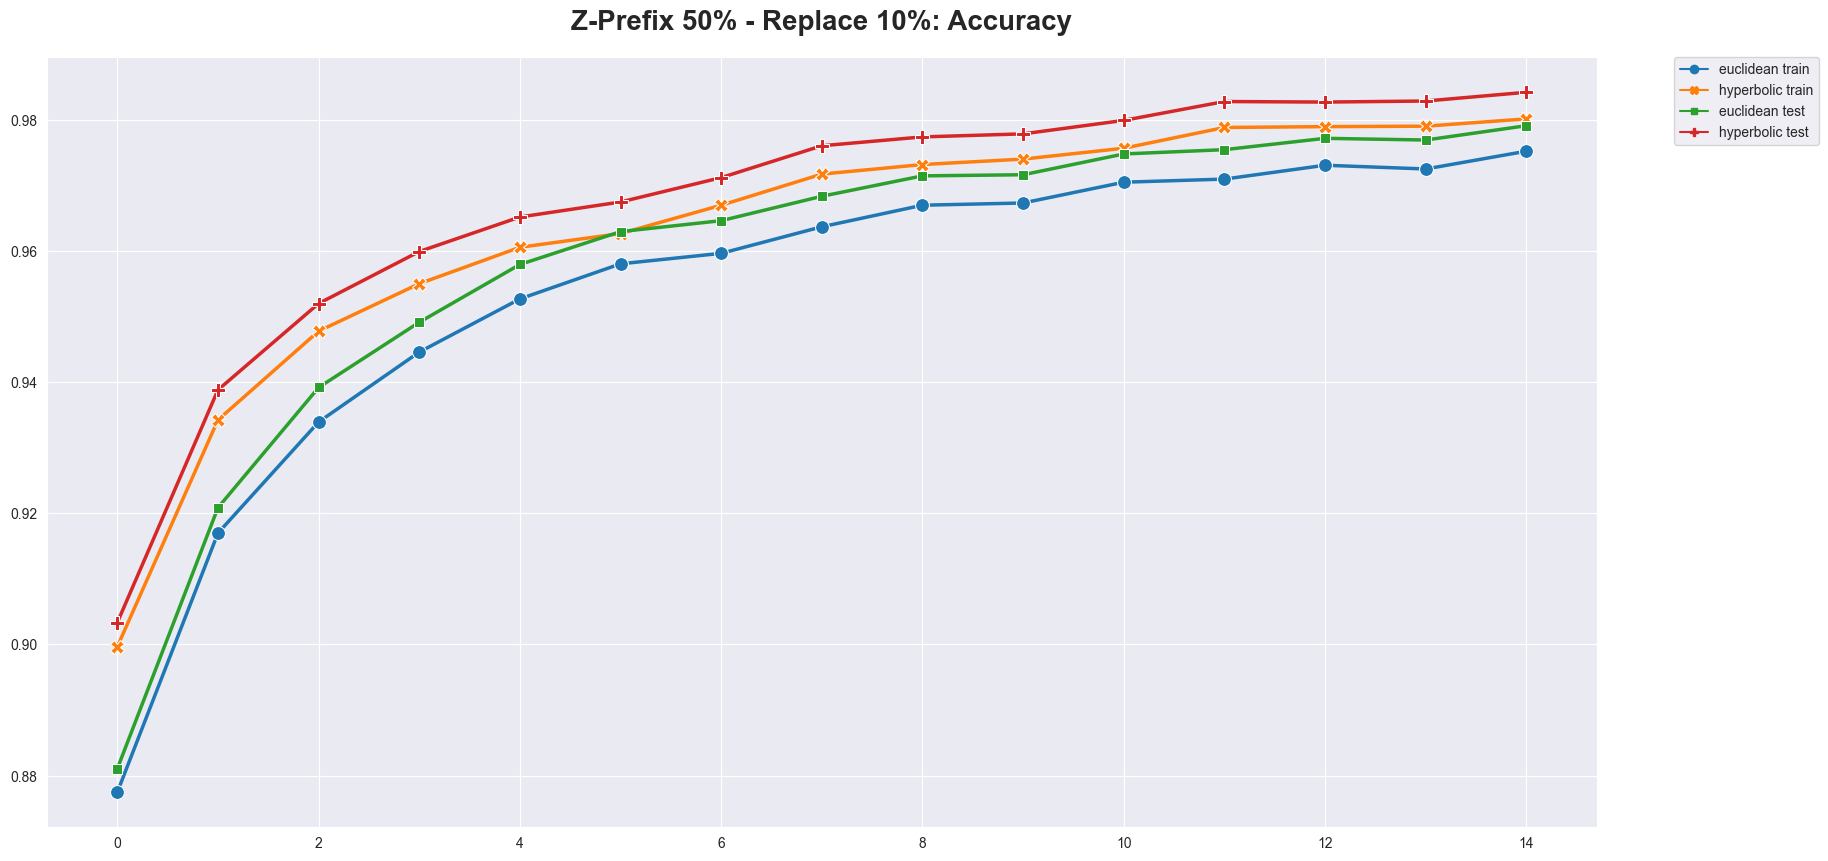

In [232]:
data = values(
    types="test",
    dataset="50",
    postives="0.5",
    replace="0.1",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 50% - Replace 10%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
fig, ax = plt.subplots()
plt.show()

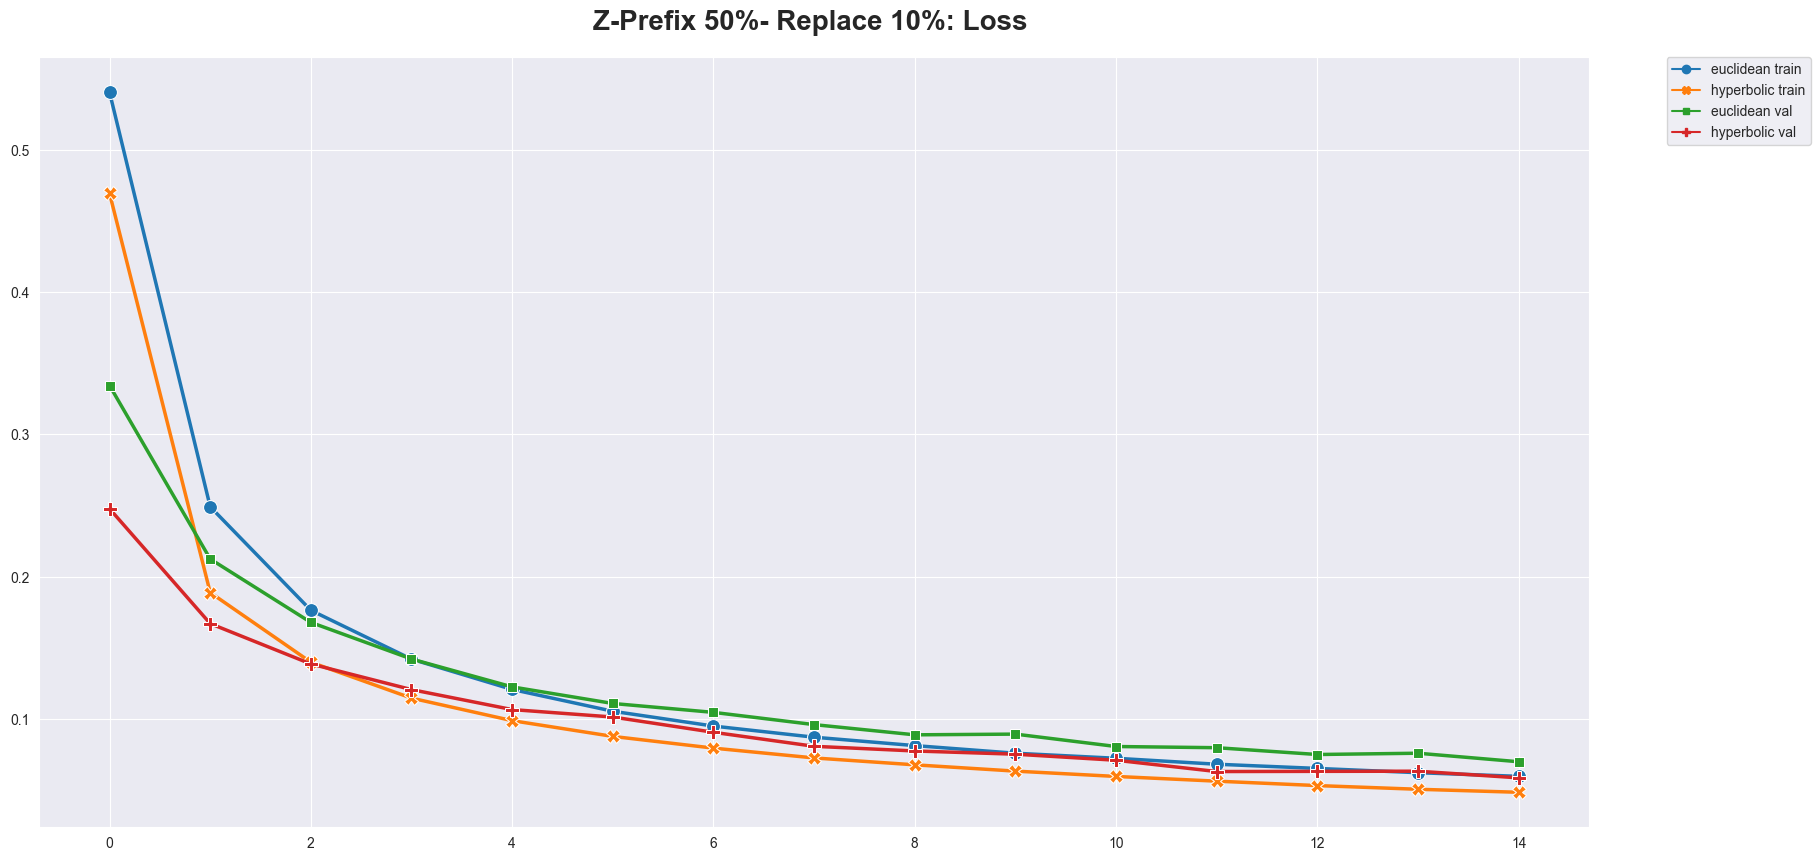

In [233]:
data = values(
    types="val",
    dataset="50",
    postives="0.5",
    replace="0.1",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 50%- Replace 10%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### II) *Replace 30%*

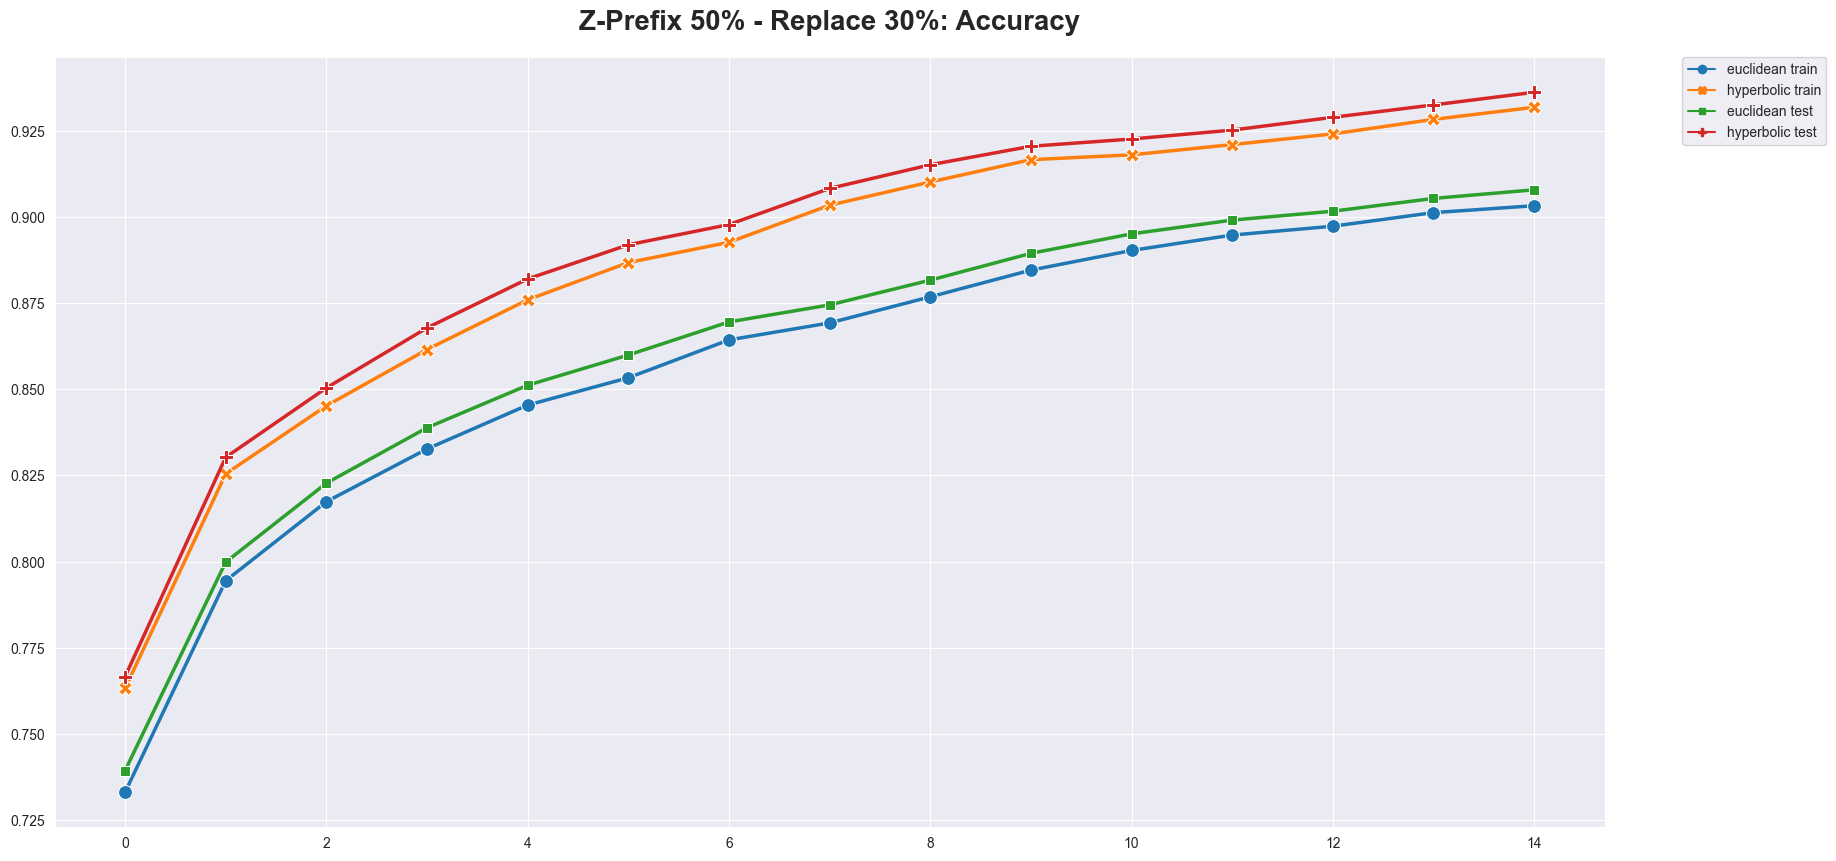

In [234]:
data = values(
    types="test",
    dataset="50",
    postives="0.5",
    replace="0.3",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 50% - Replace 30%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

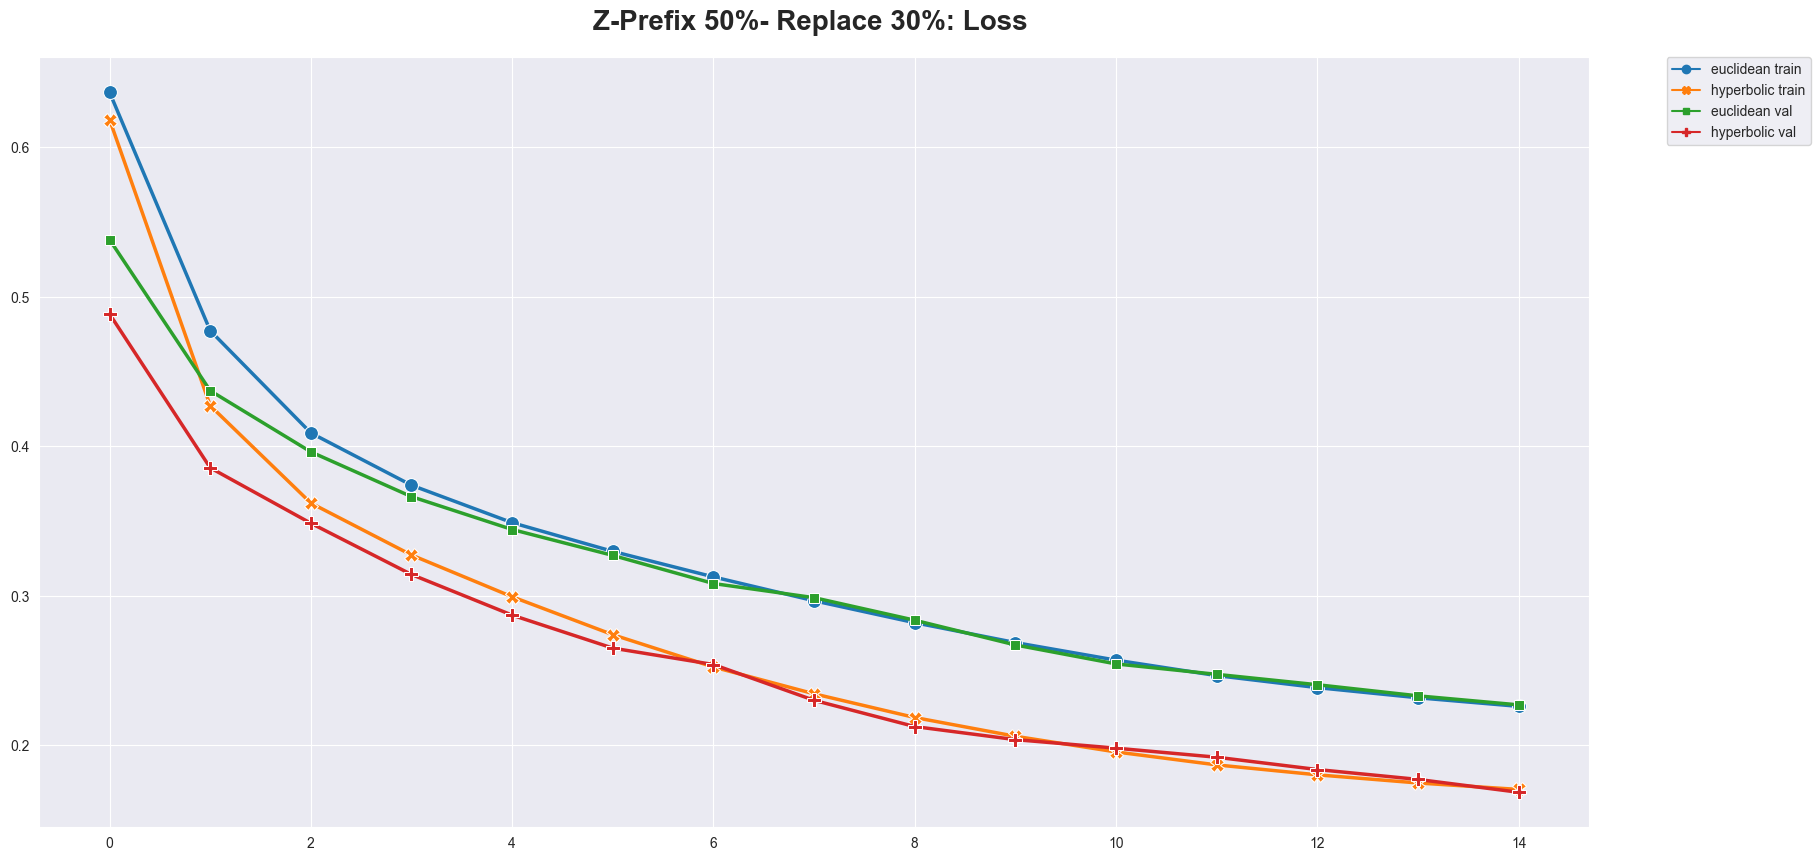

In [236]:
data = values(
    types="val",
    dataset="50",
    postives="0.5",
    replace="0.3",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 50%- Replace 30%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

 
#### III) *Replace 50%*

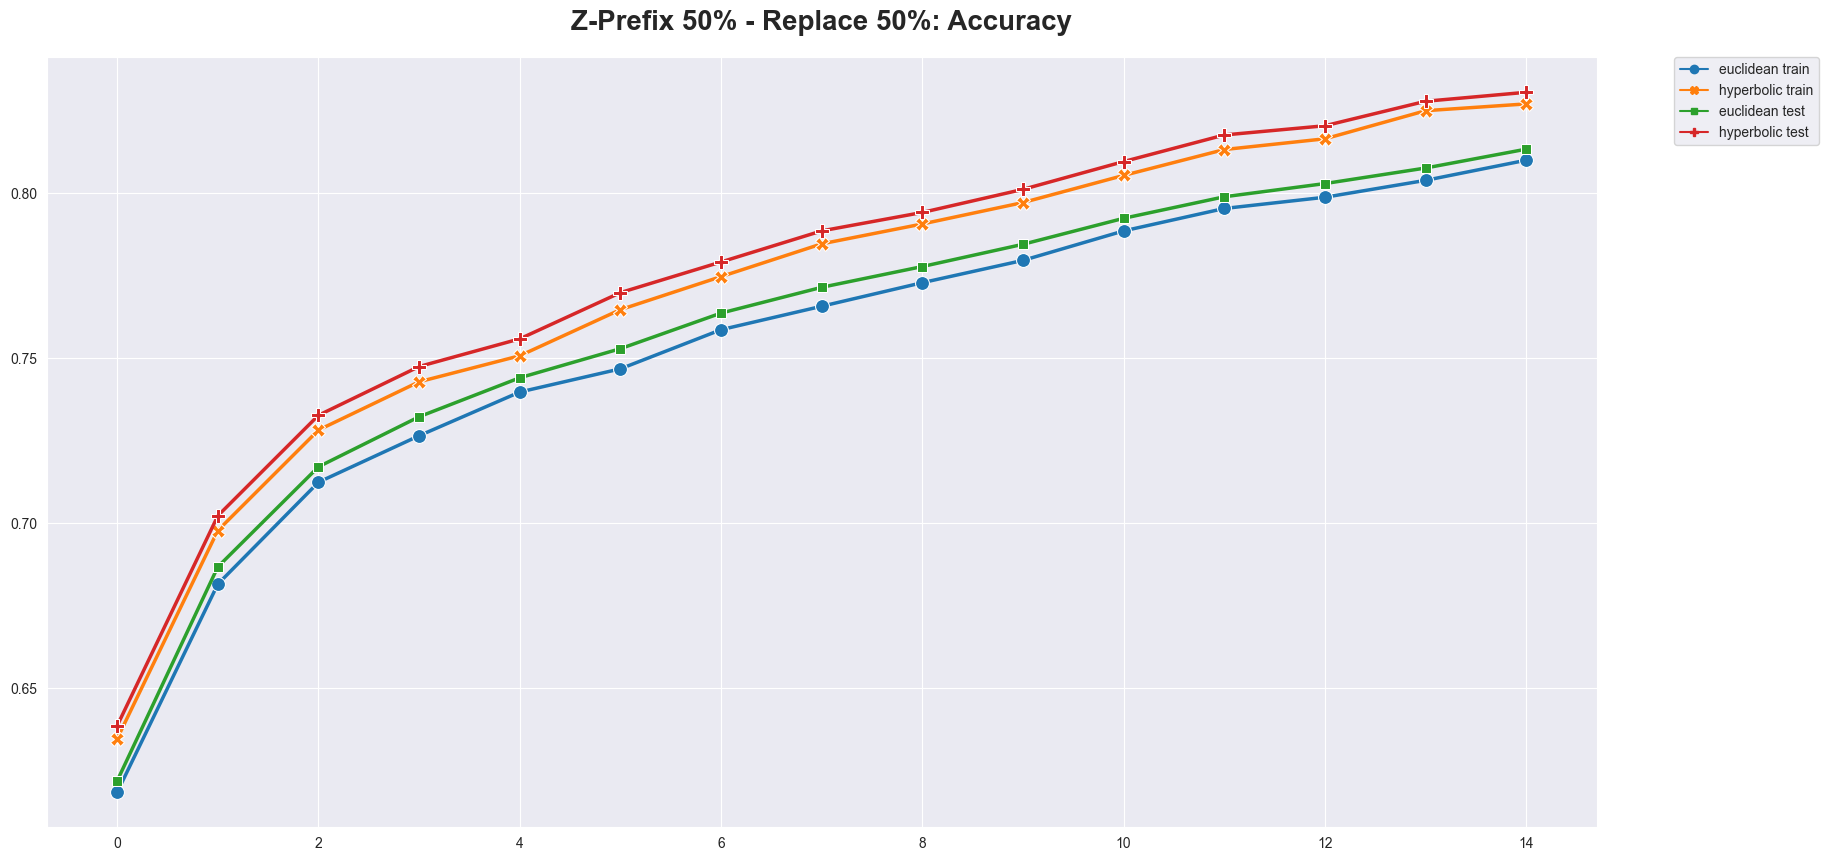

In [237]:
data = values(
    types="test",
    dataset="50",
    postives="0.5",
    replace="0.5",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 50% - Replace 50%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

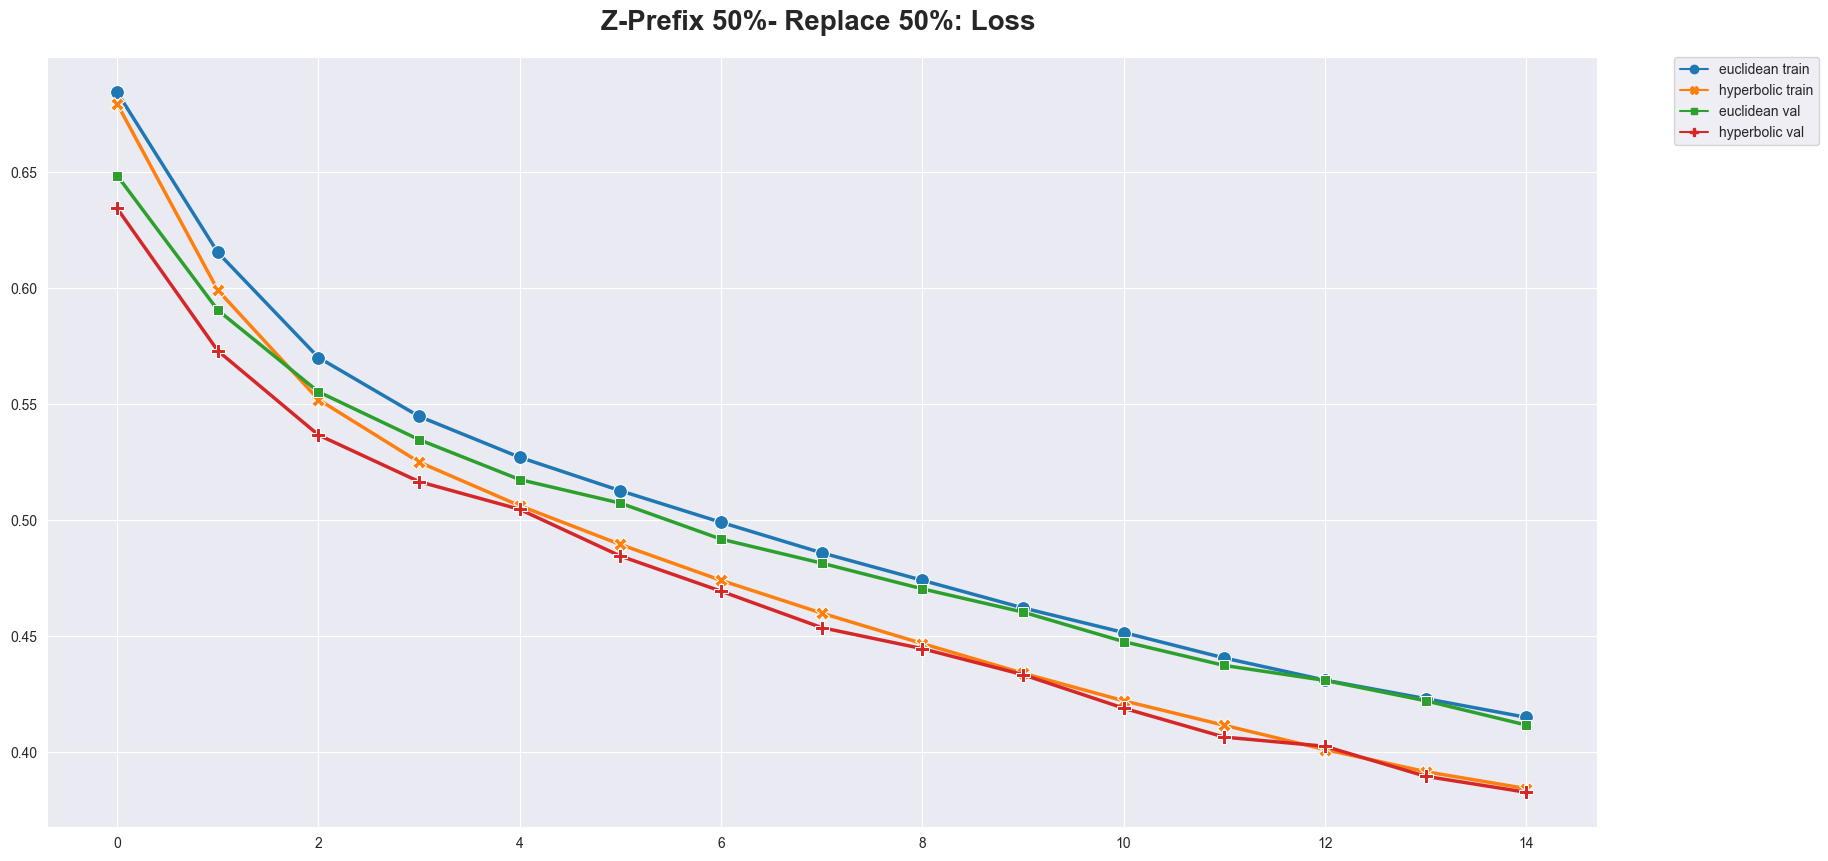

In [238]:
data = values(
    types="val",
    dataset="50",
    postives="0.5",
    replace="0.5",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 50%- Replace 50%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

#### IV) *Replace 70%*

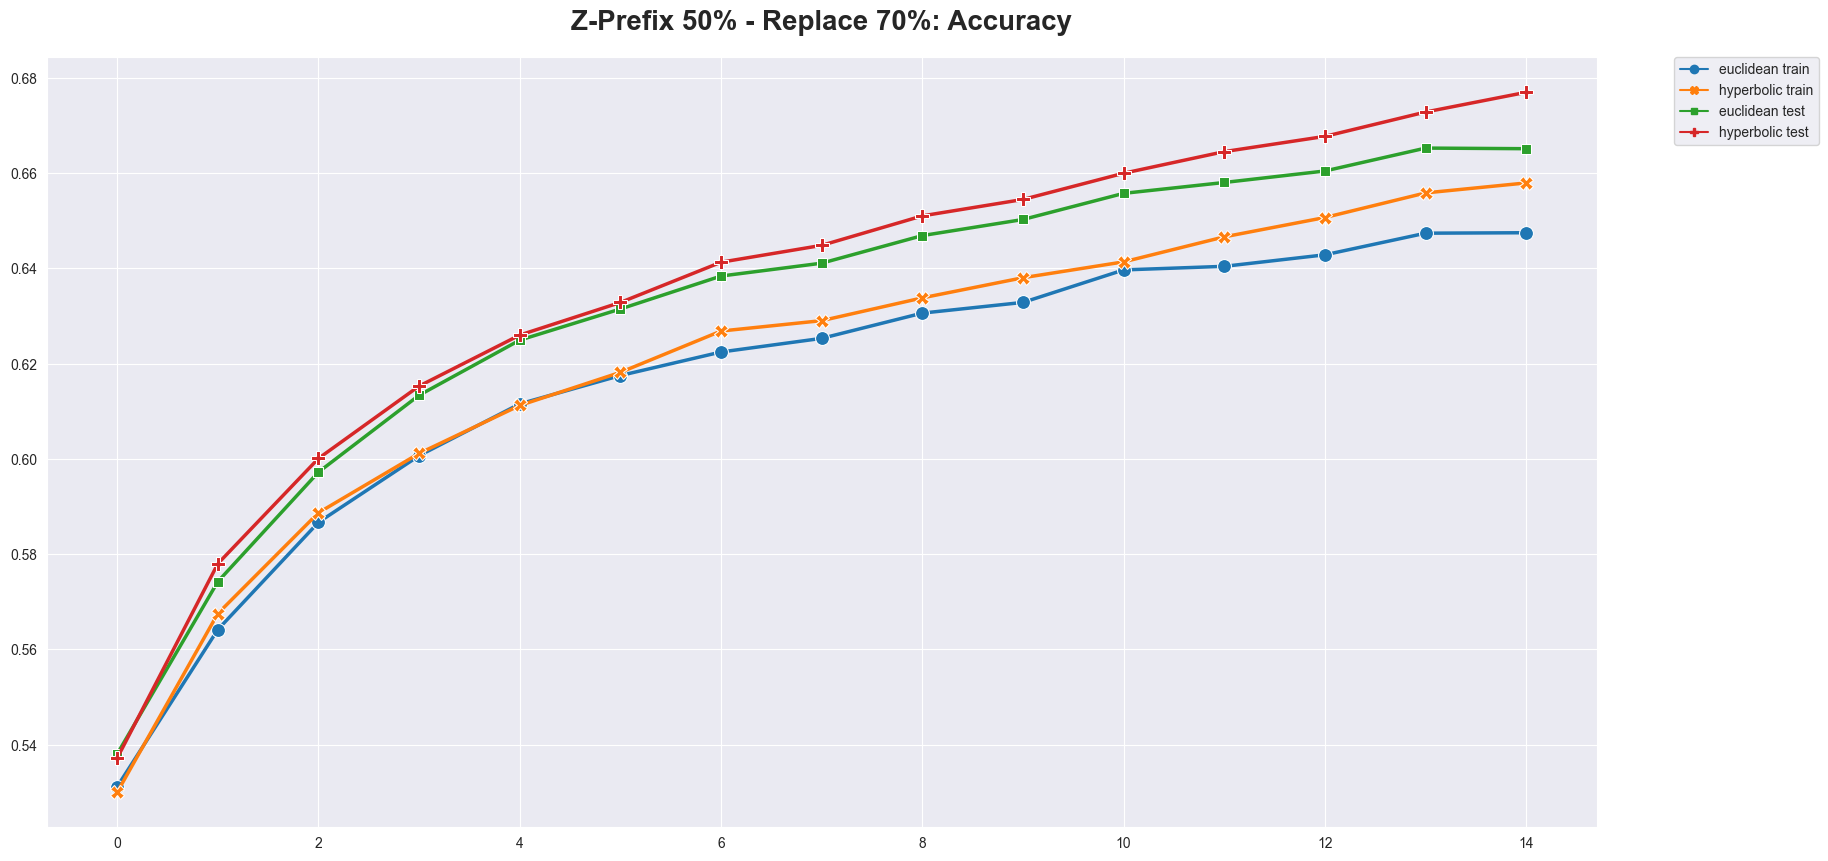

In [242]:
data = values(
    types="test",
    dataset="50",
    postives="0.5",
    replace="0.7",
    train=train_acc,
    other=test_acc,
)

plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title(
    "Z-Prefix 50% - Replace 70%: Accuracy", fontsize=20, fontweight="bold", pad=20
)
plt.show()

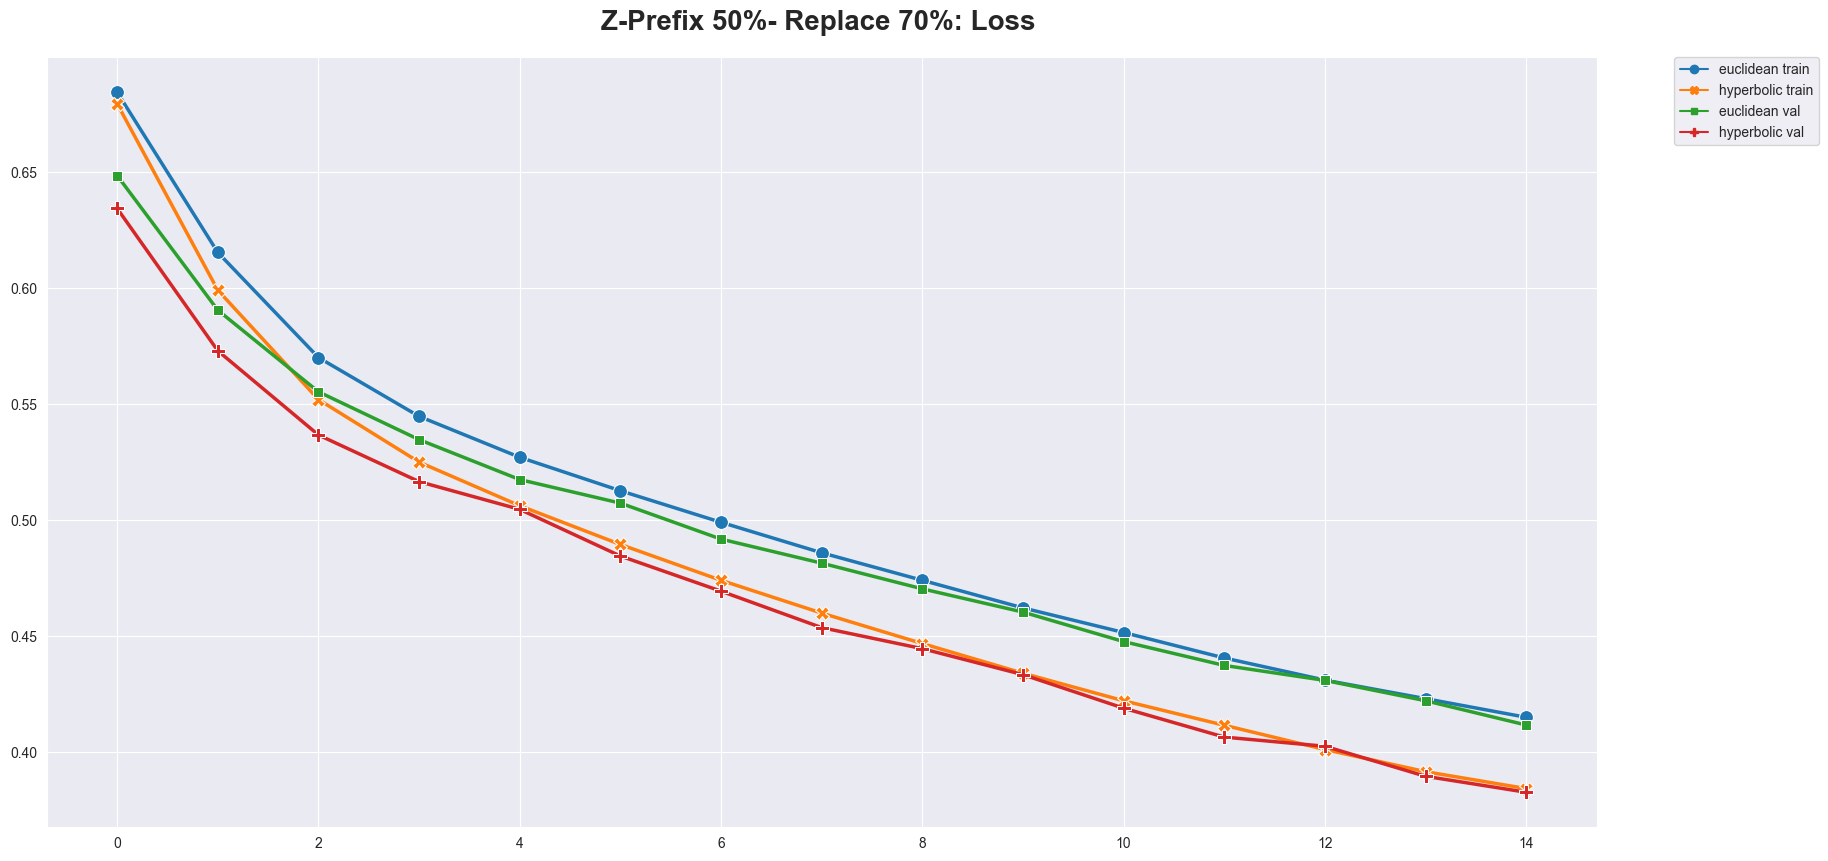

In [243]:
data = values(
    types="val",
    dataset="50",
    postives="0.5",
    replace="0.5",
    train=train_loss,
    other=val_loss,
)
plt.figure(figsize=(20, 10))
sns.lineplot(
    data=data,
    dashes=False,
    markers=True,
    palette="tab10",
    linewidth=2.5,
    markersize=10,
    legend="full",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title("Z-Prefix 50%- Replace 70%: Loss ", fontsize=20, fontweight="bold", pad=20)
plt.show()

### Intermediate Conclution:

- For 0.1 replace the results are practical the same
- Something similar happends for 0.3 replace
- Now we have to explore on 0.4 and 0.6 replace to see if the results are the same.
- Hyperbolic in every case is better than Euclidean, but we have to try with other experiments